## Final Project Submission

Please fill out:
* Student name: Jose J. Villalobos
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL: 


This will be my first data science project, I will be using the King County housing data set to build a model that can predict home prices given a set of ideal features. I will be using processes and techniques learned in the curriculum to interpret the results from my model to see which one of these features significantly impacts the predicted value.

First I will begin cleaning and preparing the data for the model, checking for missing values, checking for outliers, dealing with categorical variables and trying to improve the normality of the data as much as possible. During this process I should gain some insight as to which features might have the best predictive value. This will be achieved through some statistical methods and visualization. Finally I will build and test my model, interpret the results, and present my findings to my Business Case stakeholder. 

My audience will be first time home buyers who have no experience in real estate and need some helpful information when it comes to looking for a good value. Since they are new at this, their inexperience might lead to some high prices. I will do my best to find a few key features that might help in looking for the right first home.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
# My business case will be towards home buyers who are looking for affordable housing. 

# I will start by importing the data set and commence to clean it up.

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
initial_df = pd.read_csv("kc_house_data.csv")
initial_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# To get a feel for our data we start the EDA process with the following methods
initial_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From the initial glimpse of our data we can see that are some things going on with some of our variables. For instance
we have some outliers in the "bedrooms" and sqft_living column. I will also have to do something with the zipcode feature, as it can affect my model in a bad way. There seems to be some more categorical data that will have to turned into something my model can work with. 

In [4]:
# I will go ahead and drop the "id column", it is random data that won't be useful. 
initial_df.drop(columns = "id", inplace = True)
initial_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# I will take the date column and transform it to "datetime"
# This makes it easier to work with the data as it could turn out to be very helpful.

import datetime as dt

initial_df["date"] = pd.to_datetime(initial_df.date)
initial_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
initial_df.info()
# We have some missing values in some of the features, which we will have to deal with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(10), object(1)
memory usage: 3.3+ MB


In [7]:
# This line of code gives us the sum of the missing values(if any) in each column. 
initial_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Dealing with the null values

In the following cells I will check the percent of rows that contain null values in the specific columns. 

In [8]:
initial_df["waterfront"].isna().sum() / len(initial_df.index)
# 11% of the rows of "waterfront" column have null values

0.11001527989998611

In [9]:
initial_df["view"].isna().sum() / len(initial_df.index)
# less than 1% of the rows of the "view" column have null values
# Here we can just drop the rows that contain null values

0.0029170718155299346

In [10]:
initial_df["yr_renovated"].isna().sum() / len(initial_df.index)
# 17% of the rows of the "yr_renovated" column have null values

0.17789507802009538

In [11]:
# I will drop the rows from view that contain null values
initial_df.dropna(subset = ["view"], inplace= True)
initial_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [12]:
# This confirms the rows have been dropped
initial_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We still have two features that contain missing values:
    1. waterfront
    2. yr_renovated

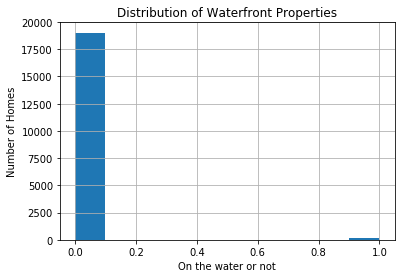

In [13]:
# Now I will look at the distribution of the values in the "waterfront" column
initial_df["waterfront"].hist();
plt.title("Distribution of Waterfront Properties")
plt.xlabel("On the water or not")
plt.ylabel("Number of Homes")
plt.show()

In [14]:
# My observation is that the bulk of the homes are not on the waterfront,
# therefore I will fill in the missing values with a 0
initial_df["waterfront"].fillna(0, inplace = True)

In [15]:
initial_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

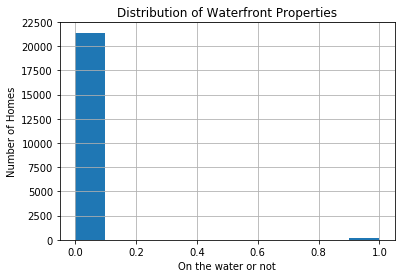

In [16]:
initial_df["waterfront"].hist();
plt.title("Distribution of Waterfront Properties")
plt.xlabel("On the water or not")
plt.ylabel("Number of Homes")
plt.show()

After filling the missing data with 0, the distribution remained pretty much the same. 

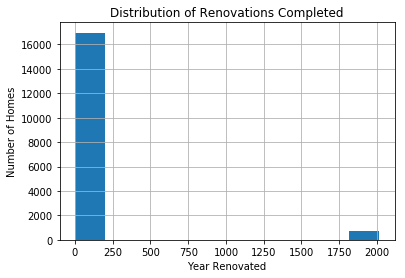

In [17]:
initial_df["yr_renovated"].hist();
plt.title("Distribution of Renovations Completed")
plt.xlabel("Year Renovated")
plt.ylabel("Number of Homes")
plt.show()

Here I observed the same situation as I did with "waterfront", 95% of the data is a 0, which most likely means a renovation has not been perfomed. I will proceed to fill in those missing values with a 0. 

In [18]:
initial_df["yr_renovated"].describe()

count    17704.000000
mean        83.765025
std        400.239690
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

Based on the results above I will use the median to fill in the missing values. 

In [19]:
initial_df["yr_renovated"].fillna(initial_df["yr_renovated"].median(), inplace = True)

In [20]:
initial_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

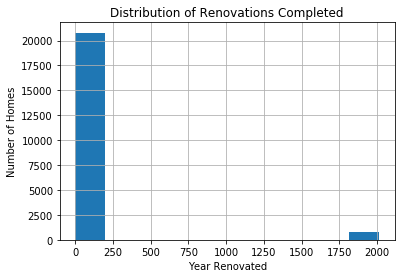

In [21]:
initial_df["yr_renovated"].hist();
plt.title("Distribution of Renovations Completed")
plt.xlabel("Year Renovated")
plt.ylabel("Number of Homes")
plt.show()

##### As seen in the histogram above, the distribution was not greatly affected by my strategy. 

## More Missing Data

Now that we have taken care of our null values, it's time to look a bit more deeply into our data to look 
for any missing values that are not immediately seen.

In [22]:
initial_df.dtypes
# The dtype for sqft_basement is object when it should be an int64 dtype,
# this could be an indication of a value that takes place of missing data.

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


#### Now we will look to see what is going on with the values in each of the columns of our DF.


In [23]:
# This loop will give us a view of all the columns in our DF with their value counts,
# giving us insight into what is odd about the data. 
for col in initial_df.columns:
    print(col, '\n', initial_df[col].value_counts(normalize=True).head(), '\n\n')

date 
 2014-06-23    0.006594
2014-06-25    0.006083
2014-06-26    0.006083
2014-07-08    0.005898
2015-04-27    0.005758
Name: date, dtype: float64 


price 
 450000.0    0.007941
350000.0    0.007941
550000.0    0.007384
500000.0    0.007059
425000.0    0.006966
Name: price, dtype: float64 


bedrooms 
 3    0.454676
4    0.318798
2    0.127891
5    0.074115
6    0.012538
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249094
1.00    0.178369
1.75    0.140940
2.25    0.094595
2.00    0.089440
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006408
1400    0.006223
1440    0.006176
1010    0.005991
1800    0.005991
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016578
6000    0.013467
4000    0.011656
7200    0.010216
4800    0.005526
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494242
2.0    0.381304
1.5    0.088372
3.0    0.028374
2.5    0.007384
Name: floors, dtype: float64 


waterfront 
 0.0    0.993266
1.0    0.006734
Name: waterfront, dtype: 

Taking a look at the columns, the sqft_basement feature has a "?" as placeholder value for 2% of the entries. This is a low amount considering the amount of observations we have, so I will treat them as NaN values and drop them from my dataframe.

In [24]:
# I will procede to replace the "?" with a NaN value. 
initial_df["sqft_basement"].replace("?", np.nan, inplace=True)

In [25]:
initial_df.isna().sum()

date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    452
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64


Now we drop the NaN values, resulting in a DF with no missing values. 

In [26]:
initial_df.dropna(inplace = True)

In [27]:
initial_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [28]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
date             21082 non-null datetime64[ns]
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null float64
view             21082 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null object
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(10), object(1)
memory usage: 3.4+ MB


Looks like there are no more missing values.

In [29]:
# We finish by converting the dtype to a float.
initial_df["sqft_basement"] = initial_df.sqft_basement.astype(float)

In [30]:
initial_df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [31]:
initial_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Now that the missing values have been taken care of it's time to move on. 

## Checking for Outliers

Outliers can impact our modeling later on, linear regression is very sensitive to them so we must deal with them accordingly. 

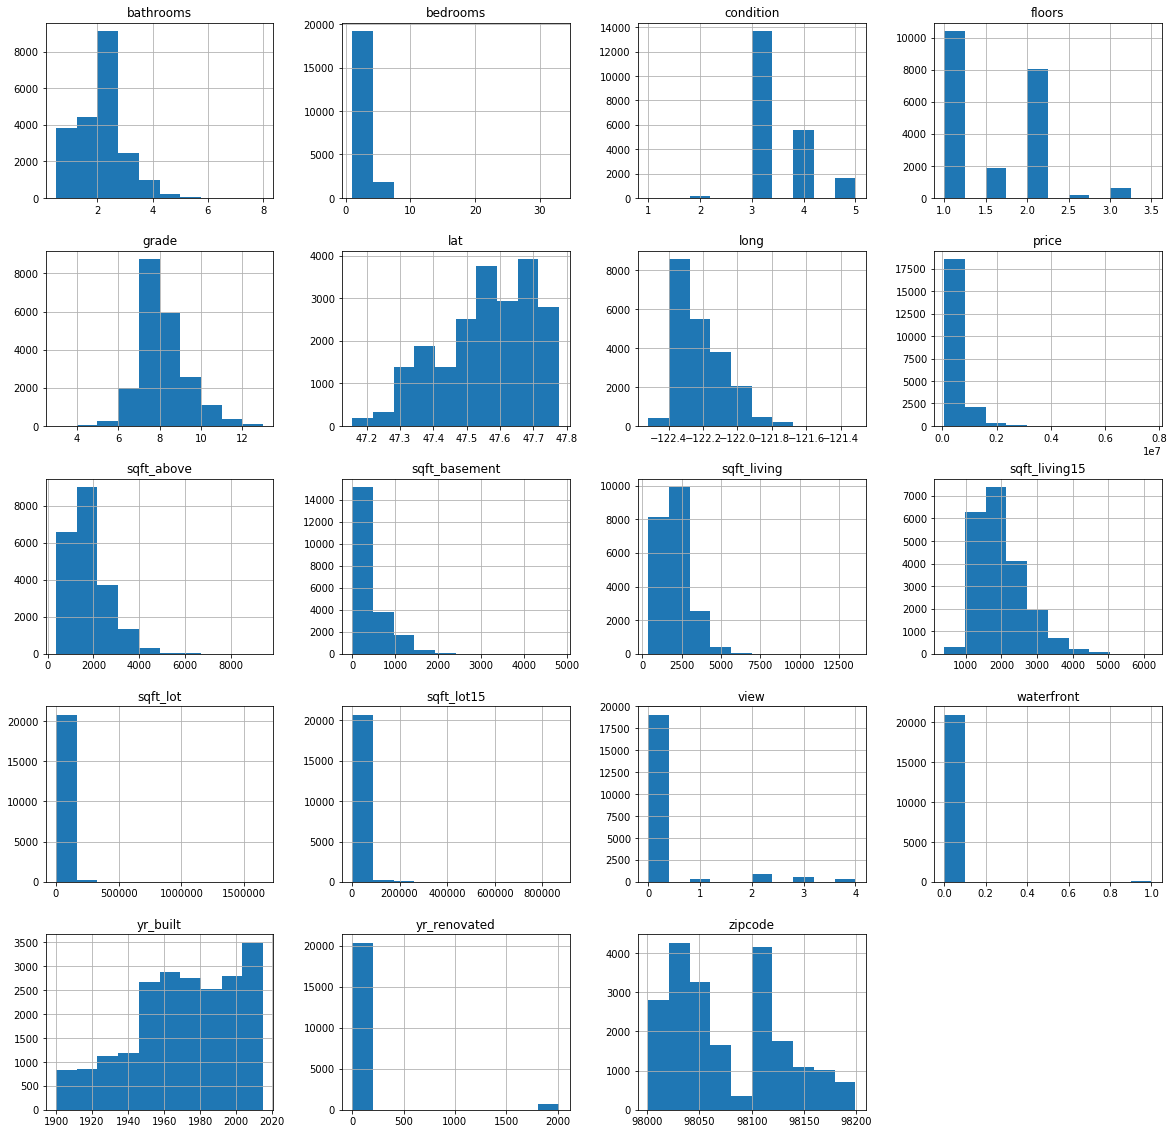

In [32]:
# Let's check the distribution of our DF
initial_df.hist(figsize= (20, 20));

According to the histogram there are quite a bit of outliers in most of our continuous data, I will separate the categorical
data and detect the outliers that our model will be highly sensitive to. 

In [33]:
# Here we are creating a DF with all our numerical data
outlier_df = initial_df.drop(["price", "date", "floors", "waterfront", "view", "condition", "grade", "yr_built", "yr_renovated", 
                             "zipcode", "lat", "long"], axis = 1)
outlier_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1180,0.0,1340,5650
1,3,2.25,2570,7242,2170,400.0,1690,7639
2,2,1.00,770,10000,770,0.0,2720,8062
3,4,3.00,1960,5000,1050,910.0,1360,5000
4,3,2.00,1680,8080,1680,0.0,1800,7503


In [34]:
outlier_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.000000,21082.000000,21082.000000,21082.000000
mean,3.372403,2.115916,2080.359975,1.507759e+04,1789.000000,291.359975,1986.917418,12732.514135
std,0.924996,0.768142,917.856396,4.117338e+04,828.369355,442.007858,685.544250,27148.781580
min,1.000000,0.500000,370.000000,5.200000e+02,370.000000,0.000000,399.000000,651.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1200.000000,0.000000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.620000e+03,1560.000000,0.000000,1840.000000,7626.000000
75%,4.000000,2.500000,2550.000000,1.069775e+04,2210.000000,560.000000,2360.000000,10088.750000
max,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,871200.000000


In [35]:
# This cell will get the z-score of all my data and then filter out the observations if the score is less than 3 standard
# deviations from the mean. 
from scipy import stats

z = np.abs(stats.zscore(outlier_df))
outlier_df = outlier_df[(z < 3).all(axis = 1)]

In [36]:
outlier_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000
mean,3.327552,2.057951,1982.203279,10130.817175,1712.837578,269.365701,1930.164829,9303.358582
std,0.854942,0.700129,764.017042,11864.083381,718.355585,399.556593,614.525183,9181.351878
min,1.000000,0.500000,370.000000,520.000000,370.000000,0.000000,460.000000,651.000000
25%,3.000000,1.500000,1400.000000,5000.000000,1180.000000,0.000000,1470.000000,5001.000000
50%,3.000000,2.250000,1870.000000,7455.000000,1520.000000,0.000000,1810.000000,7500.000000
75%,4.000000,2.500000,2454.000000,10080.000000,2120.000000,530.000000,2300.000000,9722.000000
max,6.000000,4.250000,4830.000000,137214.000000,4270.000000,1610.000000,4042.000000,93825.000000


After filtering out the outliers we can see that the mean and median values have gotten closer to being the same. 

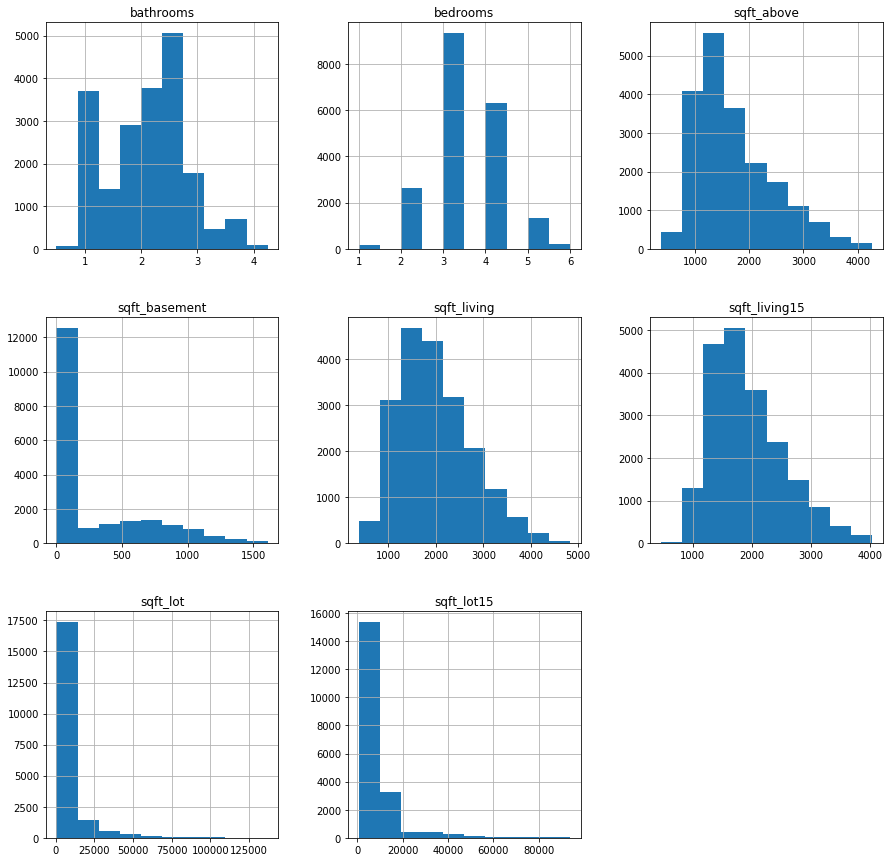

In [37]:
outlier_df.hist(figsize = (15, 15));

In [38]:
# Here I will merge the two data frames in order to have a new dataset with no outliers. 
new_df = outlier_df.join(initial_df, how = "inner", lsuffix= "_new")
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,date,price,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1180,0.0,1340,5650,2014-10-13,221900.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2170,400.0,1690,7639,2014-12-09,538000.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,770,0.0,2720,8062,2015-02-25,180000.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1050,910.0,1360,5000,2014-12-09,604000.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1680,0.0,1800,7503,2015-02-18,510000.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19948 entries, 0 to 21596
Data columns (total 28 columns):
bedrooms_new         19948 non-null int64
bathrooms_new        19948 non-null float64
sqft_living_new      19948 non-null int64
sqft_lot_new         19948 non-null int64
sqft_above_new       19948 non-null int64
sqft_basement_new    19948 non-null float64
sqft_living15_new    19948 non-null int64
sqft_lot15_new       19948 non-null int64
date                 19948 non-null datetime64[ns]
price                19948 non-null float64
bedrooms             19948 non-null int64
bathrooms            19948 non-null float64
sqft_living          19948 non-null int64
sqft_lot             19948 non-null int64
floors               19948 non-null float64
waterfront           19948 non-null float64
view                 19948 non-null float64
condition            19948 non-null int64
grade                19948 non-null int64
sqft_above           19948 non-null int64
sqft_basement        19948 n

Now that I have filtered the outliers and joined my data I will drop the unfiltered columns from my dataset.

In [40]:
new_df.columns

Index(['bedrooms_new', 'bathrooms_new', 'sqft_living_new', 'sqft_lot_new',
       'sqft_above_new', 'sqft_basement_new', 'sqft_living15_new',
       'sqft_lot15_new', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:
# After dropping the old columns we now have a dataset that has filtered the outliers.
new_df = new_df.drop(["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement",
                      "sqft_living15", "sqft_lot15"], axis = 1)

In [42]:
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,date,price,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,3,1.00,1180,5650,1180,0.0,1340,5650,2014-10-13,221900.0,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257
1,3,2.25,2570,7242,2170,400.0,1690,7639,2014-12-09,538000.0,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319
2,2,1.00,770,10000,770,0.0,2720,8062,2015-02-25,180000.0,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233
3,4,3.00,1960,5000,1050,910.0,1360,5000,2014-12-09,604000.0,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393
4,3,2.00,1680,8080,1680,0.0,1800,7503,2015-02-18,510000.0,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045


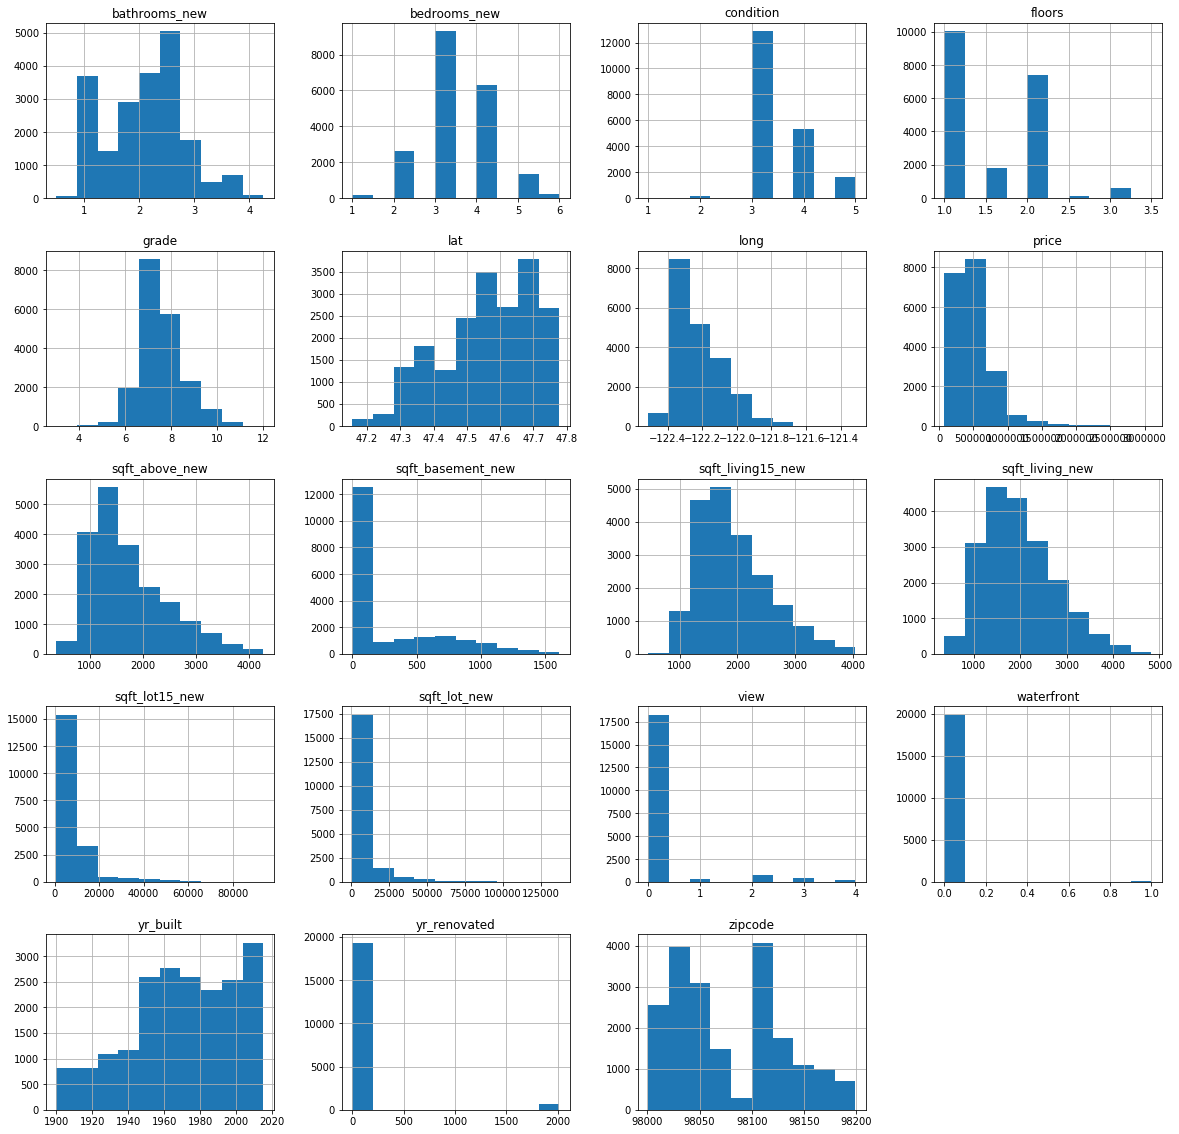

In [43]:
new_df.hist(figsize = (20, 20));

The histogram tells us that the outliers that could have affected my model are taken care of. 

## Categorical Variables

Now that the null values have been dealt with, I will continue and see if there is any categorical data to deal with. 
The histograms above have given us a bit of insight into what features could be categorical, I will use a scatter plot to get a better idea of what is going on.

In [44]:
# I will create a seperate DF, dropping the date and price columns, to create a scatter plot
# with all the other variables against price.
no_price_df = new_df.drop(["date", "price"], axis = 1)
no_price_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,3,1.00,1180,5650,1180,0.0,1340,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257
1,3,2.25,2570,7242,2170,400.0,1690,7639,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319
2,2,1.00,770,10000,770,0.0,2720,8062,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233
3,4,3.00,1960,5000,1050,910.0,1360,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393
4,3,2.00,1680,8080,1680,0.0,1800,7503,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045


This will give me further insight into what categorical variables there are and how I can deal with them.

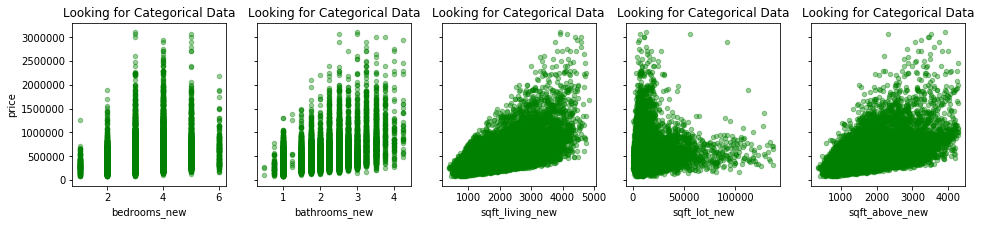

In [45]:
fig, axes = plt.subplots(nrows= 1, ncols= 5, figsize= (16, 3), sharey= True)

for x1, ax in zip(list(no_price_df)[0:5], axes):
        new_df.plot(kind = "scatter", x= x1, y= "price", ax = ax, color= "green", title = "Looking for Categorical Data",
                   alpha = 0.4)

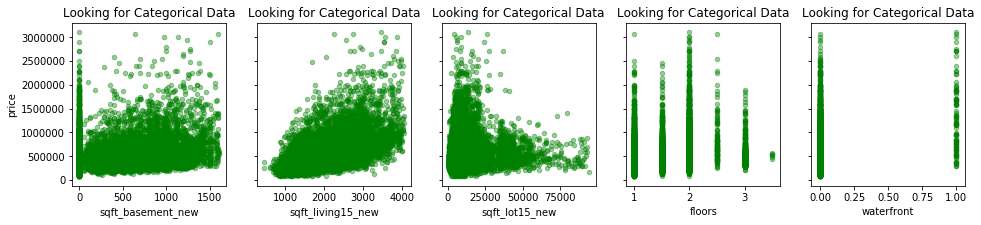

In [46]:
fig, axes = plt.subplots(nrows= 1, ncols= 5, figsize= (16, 3), sharey= True)

for x1, ax in zip(list(no_price_df)[5:10], axes):
        new_df.plot(kind = "scatter", x= x1, y= "price", ax = ax, color= "green", title = "Looking for Categorical Data",
                   alpha = 0.4)

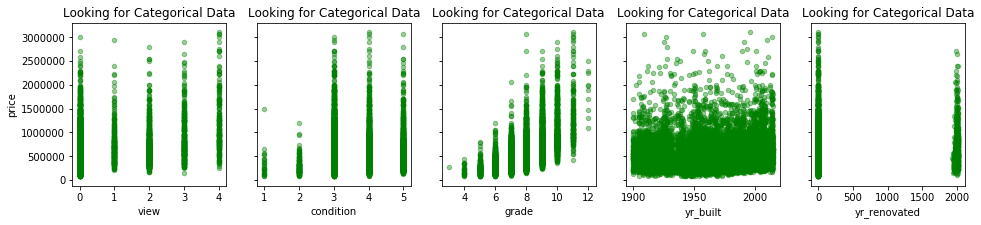

In [47]:
fig, axes = plt.subplots(nrows= 1, ncols= 5, figsize= (16, 3), sharey= True)

for x1, ax in zip(list(no_price_df)[10:15], axes):
        new_df.plot(kind = "scatter", x= x1, y= "price", ax = ax, color= "green", title = "Looking for Categorical Data",
                   alpha = 0.4)

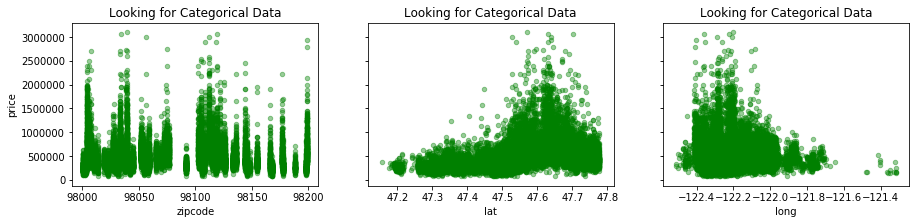

In [48]:
fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize= (15, 3), sharey= True)

for x1, ax in zip(list(no_price_df)[15:18], axes):
        new_df.plot(kind = "scatter", x= x1, y= "price", ax = ax, color= "green", title = "Looking for Categorical Data",
                   alpha = 0.4)

The vertical line structure in some of our features could lead us to believe that it could be a categorical variable. This is where judgement comes into play, "bathrooms_new", "bedrooms_new", and "floors" all have a vertical line structure in their distribution, but the values make sense and the model will be able to handle the values properly. The following cells will show which features contain categorical data and how they will be dealt with.

In [49]:
new_df["grade"].describe()
# The grade range is from 3 - 12

count    19948.000000
mean         7.567927
std          1.068444
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         12.000000
Name: grade, dtype: float64

In [50]:
new_df["grade"].nunique()

10

In [51]:
bins1 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
bins_grade = pd.cut(new_df["grade"], bins1)

In [52]:
bins_grade = bins_grade.cat.as_ordered()
bins_grade.head()

0    (6, 7]
1    (6, 7]
2    (5, 6]
3    (6, 7]
4    (7, 8]
Name: grade, dtype: category
Categories (10, interval[int64]): [(2, 3] < (3, 4] < (4, 5] < (5, 6] ... (8, 9] < (9, 10] < (10, 11] < (11, 12]]

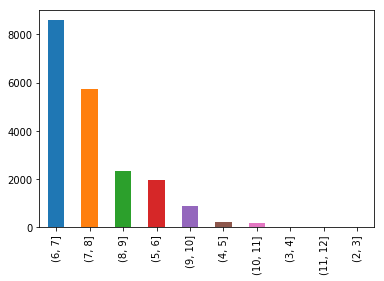

In [53]:
bins_grade.value_counts().plot(kind = "bar");

In [54]:
new_df["grade"] = bins_grade

In [55]:
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,date,price,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,3,1.00,1180,5650,1180,0.0,1340,5650,2014-10-13,221900.0,1.0,0.0,0.0,3,"(6, 7]",1955,0.0,98178,47.5112,-122.257
1,3,2.25,2570,7242,2170,400.0,1690,7639,2014-12-09,538000.0,2.0,0.0,0.0,3,"(6, 7]",1951,1991.0,98125,47.7210,-122.319
2,2,1.00,770,10000,770,0.0,2720,8062,2015-02-25,180000.0,1.0,0.0,0.0,3,"(5, 6]",1933,0.0,98028,47.7379,-122.233
3,4,3.00,1960,5000,1050,910.0,1360,5000,2014-12-09,604000.0,1.0,0.0,0.0,5,"(6, 7]",1965,0.0,98136,47.5208,-122.393
4,3,2.00,1680,8080,1680,0.0,1800,7503,2015-02-18,510000.0,1.0,0.0,0.0,3,"(7, 8]",1987,0.0,98074,47.6168,-122.045


In [56]:
new_df["condition"].describe()

count    19948.000000
mean         3.413425
std          0.651382
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [57]:
new_df["condition"].nunique()

5

In [58]:
bins2 = [0, 1, 2, 3, 4, 5]
bins_cond = pd.cut(new_df["condition"], bins2)

In [59]:
bins_cond = bins_cond.cat.as_ordered()
bins_cond.head()

0    (2, 3]
1    (2, 3]
2    (2, 3]
3    (4, 5]
4    (2, 3]
Name: condition, dtype: category
Categories (5, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5]]

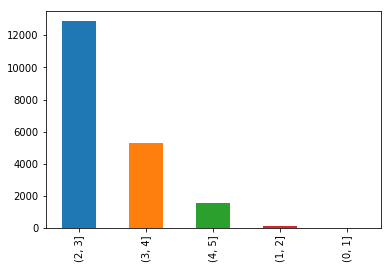

In [60]:
bins_cond.value_counts().plot(kind = "bar");

In [61]:
new_df["condition"] = bins_cond
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,date,price,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,3,1.00,1180,5650,1180,0.0,1340,5650,2014-10-13,221900.0,1.0,0.0,0.0,"(2, 3]","(6, 7]",1955,0.0,98178,47.5112,-122.257
1,3,2.25,2570,7242,2170,400.0,1690,7639,2014-12-09,538000.0,2.0,0.0,0.0,"(2, 3]","(6, 7]",1951,1991.0,98125,47.7210,-122.319
2,2,1.00,770,10000,770,0.0,2720,8062,2015-02-25,180000.0,1.0,0.0,0.0,"(2, 3]","(5, 6]",1933,0.0,98028,47.7379,-122.233
3,4,3.00,1960,5000,1050,910.0,1360,5000,2014-12-09,604000.0,1.0,0.0,0.0,"(4, 5]","(6, 7]",1965,0.0,98136,47.5208,-122.393
4,3,2.00,1680,8080,1680,0.0,1800,7503,2015-02-18,510000.0,1.0,0.0,0.0,"(2, 3]","(7, 8]",1987,0.0,98074,47.6168,-122.045


In [62]:
dum_grade = pd.get_dummies(bins_grade, prefix = "grd")
dum_cond = pd.get_dummies(bins_cond, prefix = "cond")

In [63]:
new_df = new_df.drop(["grade", "condition"], axis = 1)
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,date,price,floors,waterfront,view,yr_built,yr_renovated,zipcode,lat,long
0,3,1.00,1180,5650,1180,0.0,1340,5650,2014-10-13,221900.0,1.0,0.0,0.0,1955,0.0,98178,47.5112,-122.257
1,3,2.25,2570,7242,2170,400.0,1690,7639,2014-12-09,538000.0,2.0,0.0,0.0,1951,1991.0,98125,47.7210,-122.319
2,2,1.00,770,10000,770,0.0,2720,8062,2015-02-25,180000.0,1.0,0.0,0.0,1933,0.0,98028,47.7379,-122.233
3,4,3.00,1960,5000,1050,910.0,1360,5000,2014-12-09,604000.0,1.0,0.0,0.0,1965,0.0,98136,47.5208,-122.393
4,3,2.00,1680,8080,1680,0.0,1800,7503,2015-02-18,510000.0,1.0,0.0,0.0,1987,0.0,98074,47.6168,-122.045


In [64]:
new_df = pd.concat([new_df, dum_grade, dum_cond], axis =1)
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,date,price,...,"grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]"
0,3,1.00,1180,5650,1180,0.0,1340,5650,2014-10-13,221900.0,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2170,400.0,1690,7639,2014-12-09,538000.0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,770,0.0,2720,8062,2015-02-25,180000.0,...,0,0,0,0,0,0,0,1,0,0
3,4,3.00,1960,5000,1050,910.0,1360,5000,2014-12-09,604000.0,...,0,0,0,0,0,0,0,0,0,1
4,3,2.00,1680,8080,1680,0.0,1800,7503,2015-02-18,510000.0,...,1,0,0,0,0,0,0,1,0,0


###### The date and zipcode features can be very useful in our model, they must be handled in a way that would be able to work well with the model.

   First we will deal with the date. **What season tends to bring lower house prices?**

In [65]:
# I will create a new column that will represent 4 different seasons.
new_df["4_seasons"] = new_df.date.apply(lambda dt: (dt.month % 12 + 3) // 3)
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,date,price,...,"grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]",4_seasons
0,3,1.00,1180,5650,1180,0.0,1340,5650,2014-10-13,221900.0,...,0,0,0,0,0,0,1,0,0,4
1,3,2.25,2570,7242,2170,400.0,1690,7639,2014-12-09,538000.0,...,0,0,0,0,0,0,1,0,0,1
2,2,1.00,770,10000,770,0.0,2720,8062,2015-02-25,180000.0,...,0,0,0,0,0,0,1,0,0,1
3,4,3.00,1960,5000,1050,910.0,1360,5000,2014-12-09,604000.0,...,0,0,0,0,0,0,0,0,1,1
4,3,2.00,1680,8080,1680,0.0,1800,7503,2015-02-18,510000.0,...,0,0,0,0,0,0,1,0,0,1


In [66]:
sns.set_style("darkgrid")

C:\Users\teach\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


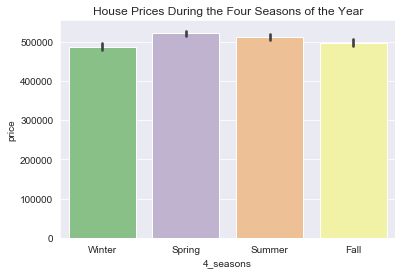

In [67]:
sns.barplot(x= "4_seasons", y = "price", data = new_df, palette = "Accent");
plt.xticks(np.arange(4), ("Winter", "Spring", "Summer", "Fall"));
plt.title("House Prices During the Four Seasons of the Year")
plt.show()

We can definitely see that the best time to buy a house at a lower price is during the winter months and we want avoid buying in the spring because prices are at their highest. 

In [68]:
# This categorical data will need to be dealt with. 
bins3 = [0, 1, 2, 3, 4,]
bins_4sea = pd.cut(new_df["4_seasons"], bins3)
bins_4sea = bins_4sea.cat.as_ordered()

In [69]:
bins_4sea.head()

0    (3, 4]
1    (0, 1]
2    (0, 1]
3    (0, 1]
4    (0, 1]
Name: 4_seasons, dtype: category
Categories (4, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4]]

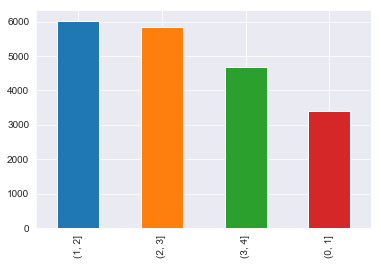

In [70]:
bins_4sea.value_counts().plot(kind = "bar")

In [71]:
new_df["4_seasons"] = bins_4sea
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,date,price,...,"grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]",4_seasons
0,3,1.00,1180,5650,1180,0.0,1340,5650,2014-10-13,221900.0,...,0,0,0,0,0,0,1,0,0,"(3, 4]"
1,3,2.25,2570,7242,2170,400.0,1690,7639,2014-12-09,538000.0,...,0,0,0,0,0,0,1,0,0,"(0, 1]"
2,2,1.00,770,10000,770,0.0,2720,8062,2015-02-25,180000.0,...,0,0,0,0,0,0,1,0,0,"(0, 1]"
3,4,3.00,1960,5000,1050,910.0,1360,5000,2014-12-09,604000.0,...,0,0,0,0,0,0,0,0,1,"(0, 1]"
4,3,2.00,1680,8080,1680,0.0,1800,7503,2015-02-18,510000.0,...,0,0,0,0,0,0,1,0,0,"(0, 1]"


In [72]:
dum_4sea = pd.get_dummies(bins_4sea, prefix = "4_sea")
dum_4sea.head()

,"4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]"
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [73]:
new_df = new_df.drop(["date", "4_seasons"], axis = 1)
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,price,floors,...,"grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]"
0,3,1.00,1180,5650,1180,0.0,1340,5650,221900.0,1.0,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2170,400.0,1690,7639,538000.0,2.0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,770,0.0,2720,8062,180000.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,4,3.00,1960,5000,1050,910.0,1360,5000,604000.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,3,2.00,1680,8080,1680,0.0,1800,7503,510000.0,1.0,...,1,0,0,0,0,0,0,1,0,0


In [74]:
new_df = pd.concat([new_df, dum_4sea], axis = 1)
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,price,floors,...,"grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]"
0,3,1.00,1180,5650,1180,0.0,1340,5650,221900.0,1.0,...,0,0,0,1,0,0,0,0,0,1
1,3,2.25,2570,7242,2170,400.0,1690,7639,538000.0,2.0,...,0,0,0,1,0,0,1,0,0,0
2,2,1.00,770,10000,770,0.0,2720,8062,180000.0,1.0,...,0,0,0,1,0,0,1,0,0,0
3,4,3.00,1960,5000,1050,910.0,1360,5000,604000.0,1.0,...,0,0,0,0,0,1,1,0,0,0
4,3,2.00,1680,8080,1680,0.0,1800,7503,510000.0,1.0,...,0,0,0,1,0,0,1,0,0,0


###### OK, let's deal with the zipcodes now. 

In [75]:
new_df["zipcode"].describe()

count    19948.000000
mean     98079.296270
std         53.709879
min      98001.000000
25%      98033.000000
50%      98072.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [76]:
new_df["zipcode"].sort_values().unique()


array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=int64)

In [77]:
new_df["zipcode"].nunique()

70

That's a lot of zipcodes, which means more features but this data could be powerful in the building of my model. 

In [78]:
# I will now perform the pd.get_dummies method on the zipcode column
dum_zips = pd.get_dummies(new_df["zipcode"], prefix = "zips")
dum_zips.head()

,zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,...,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
new_df = new_df.drop(columns= "zipcode")

In [80]:
new_df.columns

Index(['bedrooms_new', 'bathrooms_new', 'sqft_living_new', 'sqft_lot_new',
       'sqft_above_new', 'sqft_basement_new', 'sqft_living15_new',
       'sqft_lot15_new', 'price', 'floors', 'waterfront', 'view', 'yr_built',
       'yr_renovated', 'lat', 'long', 'grd_(2, 3]', 'grd_(3, 4]', 'grd_(4, 5]',
       'grd_(5, 6]', 'grd_(6, 7]', 'grd_(7, 8]', 'grd_(8, 9]', 'grd_(9, 10]',
       'grd_(10, 11]', 'grd_(11, 12]', 'cond_(0, 1]', 'cond_(1, 2]',
       'cond_(2, 3]', 'cond_(3, 4]', 'cond_(4, 5]', '4_sea_(0, 1]',
       '4_sea_(1, 2]', '4_sea_(2, 3]', '4_sea_(3, 4]'],
      dtype='object')

In [81]:
new_df = pd.concat([new_df, dum_zips], axis = 1)

In [82]:
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,price,floors,...,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199
0,3,1.00,1180,5650,1180,0.0,1340,5650,221900.0,1.0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2170,400.0,1690,7639,538000.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,770,0.0,2720,8062,180000.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1050,910.0,1360,5000,604000.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1680,0.0,1800,7503,510000.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
new_df["view"].describe()

count    19948.000000
mean         0.197062
std          0.697572
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [84]:
new_df.view.value_counts()

0.0    18247
2.0      797
3.0      388
1.0      297
4.0      219
Name: view, dtype: int64

In [85]:
new_df["view"].sort_values().unique()

array([0., 1., 2., 3., 4.])

In [86]:
bins4 = [-1, 0, 1, 2, 3, 4]
bins_view = pd.cut(new_df["view"], bins4)
bins_view = bins_view.cat.as_ordered()

In [87]:
bins_view.head()

0    (-1, 0]
1    (-1, 0]
2    (-1, 0]
3    (-1, 0]
4    (-1, 0]
Name: view, dtype: category
Categories (5, interval[int64]): [(-1, 0] < (0, 1] < (1, 2] < (2, 3] < (3, 4]]

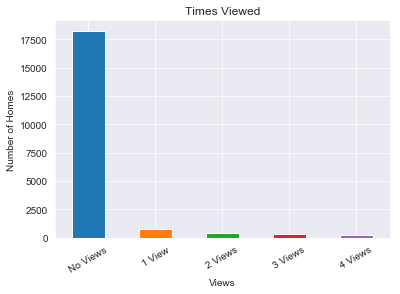

In [88]:
bins_view.value_counts().plot(kind = "bar");
plt.xticks(np.arange(5), ("No Views", "1 View", "2 Views", "3 Views", "4 Views"), rotation = 30)
plt.title("Times Viewed")
plt.xlabel("Views")
plt.ylabel("Number of Homes")
plt.show()

The graph above shows us that the vast majority of the houses have not been viewed. Does the price get affected depending on the times a house has been viewed while it's on the market? It's something interesting to investigate in the future. 

In [89]:
new_df["view"] = bins_view
new_df.view.value_counts()

(-1, 0]    18247
(1, 2]       797
(2, 3]       388
(0, 1]       297
(3, 4]       219
Name: view, dtype: int64

In [90]:
dum_view = pd.get_dummies(bins_view, prefix = "view")
dum_view.head()

,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]"
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [91]:
new_df = pd.concat([new_df, dum_view], axis = 1)
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,price,floors,...,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]"
0,3,1.00,1180,5650,1180,0.0,1340,5650,221900.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,3,2.25,2570,7242,2170,400.0,1690,7639,538000.0,2.0,...,0,0,0,0,0,1,0,0,0,0
2,2,1.00,770,10000,770,0.0,2720,8062,180000.0,1.0,...,0,0,0,0,0,1,0,0,0,0
3,4,3.00,1960,5000,1050,910.0,1360,5000,604000.0,1.0,...,0,0,0,0,0,1,0,0,0,0
4,3,2.00,1680,8080,1680,0.0,1800,7503,510000.0,1.0,...,0,0,0,0,0,1,0,0,0,0


In [92]:
new_df["yr_renovated"].describe()

count    19948.000000
mean        66.134550
std        357.260369
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [93]:
new_df["yr_renovated"].sort_values().unique()

array([   0., 1934., 1940., 1944., 1945., 1948., 1950., 1951., 1953.,
       1954., 1955., 1956., 1957., 1958., 1959., 1960., 1962., 1963.,
       1964., 1965., 1967., 1968., 1969., 1970., 1971., 1972., 1973.,
       1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982.,
       1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991.,
       1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015.])

The `yr_renovated` feature's median is 0, and from the histograms above we can see that 0 has a high frequency in the distribution. With this in mind I will just perform `pd.get_dummies` so that the data can be used as 1 = renovation and 0 = no renovation.

In [94]:
dum_yr_reno = pd.get_dummies(new_df["yr_renovated"], prefix = "yr_reno")
dum_yr_reno.head()

,yr_reno_0.0,yr_reno_1934.0,yr_reno_1940.0,yr_reno_1944.0,yr_reno_1945.0,yr_reno_1948.0,yr_reno_1950.0,yr_reno_1951.0,yr_reno_1953.0,yr_reno_1954.0,...,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
new_df = new_df.drop(columns = "yr_renovated")


In [96]:
new_df = pd.concat([new_df, dum_yr_reno], axis = 1)
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,price,floors,...,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0
0,3,1.00,1180,5650,1180,0.0,1340,5650,221900.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570,7242,2170,400.0,1690,7639,538000.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,770,0.0,2720,8062,180000.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1050,910.0,1360,5000,604000.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1680,0.0,1800,7503,510000.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
new_df["yr_built"].describe()

count    19948.000000
mean      1970.376278
std         29.425697
min       1900.000000
25%       1951.000000
50%       1973.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64

In [98]:
new_df["yr_built"].nunique()

116

In [99]:
new_df["yr_built"].sort_values().unique()

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

`yr_built` on the other hand has it's values better distributed than `yr_renovated`, this could be helpful to our model. **If the house was built in a certain decade, would it change the price?**

In [100]:
bins6 = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2020]
new_df["yr_built"] = pd.cut(new_df["yr_built"], bins6)

In [101]:
new_df["yr_built"] = new_df["yr_built"].cat.as_ordered()
new_df["yr_built"].head()

0    (1950, 1960]
1    (1950, 1960]
2    (1930, 1940]
3    (1960, 1970]
4    (1980, 1990]
Name: yr_built, dtype: category
Categories (11, interval[int64]): [(1900, 1910] < (1910, 1920] < (1920, 1930] < (1930, 1940] ... (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2020]]

C:\Users\teach\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


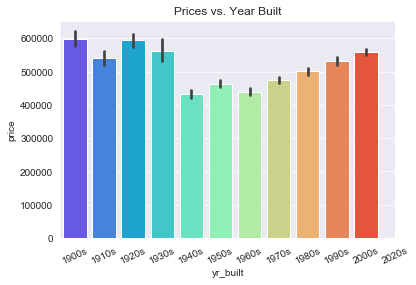

In [102]:
sns.barplot(x= "yr_built", y = "price", data = new_df, palette = "rainbow");
plt.xticks(np.arange(12), ("1900s", "1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s",
                           "2020s"),rotation = 25);
plt.title("Prices vs. Year Built")
plt.show()

Interesting, houses built in the 1940s and 1960s, tend to be lower in price, and the older houses seem to be at a higher price point.

In [103]:
dum_yr_built = new_df["yr_built"] 

In [104]:
# This allows us to see all the columns when we perform .head(), or .describe()
pd.set_option('display.max_columns', None)


In [105]:
dum_yr_built = pd.get_dummies(dum_yr_built, prefix = "yr_built")
dum_yr_built.head()

,"yr_built_(1900, 1910]","yr_built_(1910, 1920]","yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2020]"
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0


In [106]:
new_df = new_df.drop(columns = "yr_built")

In [107]:
new_df = pd.concat([new_df, dum_yr_built], axis = 1)
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_basement_new,sqft_living15_new,sqft_lot15_new,price,floors,waterfront,view,lat,long,"grd_(2, 3]","grd_(3, 4]","grd_(4, 5]","grd_(5, 6]","grd_(6, 7]","grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]",zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,zips_98014,zips_98019,zips_98022,zips_98023,zips_98024,zips_98027,zips_98028,zips_98029,zips_98030,zips_98031,zips_98032,zips_98033,zips_98034,zips_98038,zips_98039,zips_98040,zips_98042,zips_98045,zips_98052,zips_98053,zips_98055,zips_98056,zips_98058,zips_98059,zips_98065,zips_98070,zips_98072,zips_98074,zips_98075,zips_98077,zips_98092,zips_98102,zips_98103,zips_98105,zips_98106,zips_98107,zips_98108,zips_98109,zips_98112,zips_98115,zips_98116,zips_98117,zips_98118,zips_98119,zips_98122,zips_98125,zips_98126,zips_98133,zips_98136,zips_98144,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]",yr_reno_0.0,yr_reno_1934.0,yr_reno_1940.0,yr_reno_1944.0,yr_reno_1945.0,yr_reno_1948.0,yr_reno_1950.0,yr_reno_1951.0,yr_reno_1953.0,yr_reno_1954.0,yr_reno_1955.0,yr_reno_1956.0,yr_reno_1957.0,yr_reno_1958.0,yr_reno_1959.0,yr_reno_1960.0,yr_reno_1962.0,yr_reno_1963.0,yr_reno_1964.0,yr_reno_1965.0,yr_reno_1967.0,yr_reno_1968.0,yr_reno_1969.0,yr_reno_1970.0,yr_reno_1971.0,yr_reno_1972.0,yr_reno_1973.0,yr_reno_1974.0,yr_reno_1975.0,yr_reno_1976.0,yr_reno_1977.0,yr_reno_1978.0,yr_reno_1979.0,yr_reno_1980.0,yr_reno_1981.0,yr_reno_1982.0,yr_reno_1983.0,yr_reno_1984.0,yr_reno_1985.0,yr_reno_1986.0,yr_reno_1987.0,yr_reno_1988.0,yr_reno_1989.0,yr_reno_1990.0,yr_reno_1991.0,yr_reno_1992.0,yr_reno_1993.0,yr_reno_1994.0,yr_reno_1995.0,yr_reno_1996.0,yr_reno_1997.0,yr_reno_1998.0,yr_reno_1999.0,yr_reno_2000.0,yr_reno_2001.0,yr_reno_2002.0,yr_reno_2003.0,yr_reno_2004.0,yr_reno_2005.0,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0,"yr_built_(1900, 1910]","yr_built_(1910, 1920]","yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2020]"
0,3,1.00,1180,5650,1180,0.0,1340,5650,221900.0,1.0,0.0,"(-1, 0]",47.5112,-122.257,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3,2.25,2570,7242,2170,400.0,1690,7639,538000.0,2.0,0.0,"(-1, 0]",47.7210,-122.319,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,1.00,770,10000,770,0.0,2720,8062,180000.0,1.0,0.0,"(-1, 0]",47.7379,-122.233,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1050,910.0,1360,5000,604000.0,1.0,0.0,"(-1, 0]",47.5208,-122.393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [108]:
new_df["sqft_basement_new"].describe()

count    19948.000000
mean       269.365701
std        399.556593
min          0.000000
25%          0.000000
50%          0.000000
75%        530.000000
max       1610.000000
Name: sqft_basement_new, dtype: float64

In [109]:
new_df["sqft_basement_new"].nunique()

209

In [110]:
new_df["sqft_basement_new"].sort_values().unique()

array([   0.,   10.,   20.,   40.,   50.,   60.,   65.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  143.,  145.,  150.,
        160.,  170.,  172.,  176.,  180.,  190.,  200.,  207.,  210.,
        220.,  225.,  230.,  235.,  240.,  243.,  248.,  250.,  260.,
        265.,  266.,  270.,  274.,  276.,  280.,  283.,  290.,  295.,
        300.,  310.,  320.,  330.,  340.,  350.,  360.,  370.,  374.,
        380.,  390.,  400.,  410.,  414.,  415.,  417.,  420.,  430.,
        435.,  440.,  450.,  460.,  470.,  480.,  490.,  500.,  506.,
        508.,  510.,  515.,  516.,  518.,  520.,  530.,  540.,  550.,
        556.,  560.,  570.,  580.,  588.,  590.,  600.,  602.,  610.,
        620.,  630.,  640.,  650.,  652.,  660.,  666.,  670.,  680.,
        690.,  700.,  704.,  710.,  720.,  730.,  740.,  750.,  760.,
        768.,  770.,  780.,  784.,  790.,  792.,  800.,  810.,  820.,
        830.,  840.,  850.,  860.,  861.,  862.,  870.,  875.,  880.,
        890.,  900.,

Another piece of data that could be useful is the square footage of the basement. **Does it matter to the price if you have a basement or not?**

In [111]:
bins7 = [-1, 0, 1611]
new_df["sqft_basement_new"] = pd.cut(new_df["sqft_basement_new"], bins7)

In [112]:
new_df["sqft_basement_new"].head()

0      (-1, 0]
1    (0, 1611]
2      (-1, 0]
3    (0, 1611]
4      (-1, 0]
Name: sqft_basement_new, dtype: category
Categories (2, interval[int64]): [(-1, 0] < (0, 1611]]

C:\Users\teach\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


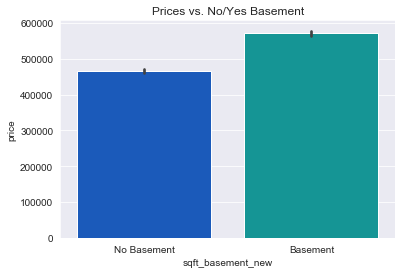

In [113]:
sns.barplot(x= "sqft_basement_new", y = "price", data = new_df, palette = "winter");
plt.xticks(np.arange(2), ("No Basement", "Basement"));
plt.title("Prices vs. No/Yes Basement")
plt.show()

Looks like if you want a lower price you won't be able to have a basement.

In [114]:
dum_basement = new_df["sqft_basement_new"] 

In [115]:
dum_basement = pd.get_dummies(dum_basement, prefix = "basement")
dum_basement.head()

,"basement_(-1, 0]","basement_(0, 1611]"
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [116]:
new_df = new_df.drop(columns = "sqft_basement_new")

In [117]:
new_df = pd.concat([new_df, dum_basement], axis = 1)
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_living15_new,sqft_lot15_new,price,floors,waterfront,view,lat,long,"grd_(2, 3]","grd_(3, 4]","grd_(4, 5]","grd_(5, 6]","grd_(6, 7]","grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]",zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,zips_98014,zips_98019,zips_98022,zips_98023,zips_98024,zips_98027,zips_98028,zips_98029,zips_98030,zips_98031,zips_98032,zips_98033,zips_98034,zips_98038,zips_98039,zips_98040,zips_98042,zips_98045,zips_98052,zips_98053,zips_98055,zips_98056,zips_98058,zips_98059,zips_98065,zips_98070,zips_98072,zips_98074,zips_98075,zips_98077,zips_98092,zips_98102,zips_98103,zips_98105,zips_98106,zips_98107,zips_98108,zips_98109,zips_98112,zips_98115,zips_98116,zips_98117,zips_98118,zips_98119,zips_98122,zips_98125,zips_98126,zips_98133,zips_98136,zips_98144,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]",yr_reno_0.0,yr_reno_1934.0,yr_reno_1940.0,yr_reno_1944.0,yr_reno_1945.0,yr_reno_1948.0,yr_reno_1950.0,yr_reno_1951.0,yr_reno_1953.0,yr_reno_1954.0,yr_reno_1955.0,yr_reno_1956.0,yr_reno_1957.0,yr_reno_1958.0,yr_reno_1959.0,yr_reno_1960.0,yr_reno_1962.0,yr_reno_1963.0,yr_reno_1964.0,yr_reno_1965.0,yr_reno_1967.0,yr_reno_1968.0,yr_reno_1969.0,yr_reno_1970.0,yr_reno_1971.0,yr_reno_1972.0,yr_reno_1973.0,yr_reno_1974.0,yr_reno_1975.0,yr_reno_1976.0,yr_reno_1977.0,yr_reno_1978.0,yr_reno_1979.0,yr_reno_1980.0,yr_reno_1981.0,yr_reno_1982.0,yr_reno_1983.0,yr_reno_1984.0,yr_reno_1985.0,yr_reno_1986.0,yr_reno_1987.0,yr_reno_1988.0,yr_reno_1989.0,yr_reno_1990.0,yr_reno_1991.0,yr_reno_1992.0,yr_reno_1993.0,yr_reno_1994.0,yr_reno_1995.0,yr_reno_1996.0,yr_reno_1997.0,yr_reno_1998.0,yr_reno_1999.0,yr_reno_2000.0,yr_reno_2001.0,yr_reno_2002.0,yr_reno_2003.0,yr_reno_2004.0,yr_reno_2005.0,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0,"yr_built_(1900, 1910]","yr_built_(1910, 1920]","yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2020]","basement_(-1, 0]","basement_(0, 1611]"
0,3,1.00,1180,5650,1180,1340,5650,221900.0,1.0,0.0,"(-1, 0]",47.5112,-122.257,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,3,2.25,2570,7242,2170,1690,7639,538000.0,2.0,0.0,"(-1, 0]",47.7210,-122.319,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2,1.00,770,10000,770,2720,8062,180000.0,1.0,0.0,"(-1, 0]",47.7379,-122.233,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,4,3.00,1960,5000,1050,1360,5000,604000.0,1.0,0.0,"(-1, 0]",47.5208,-122.393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,

That does it for our categorical variables, now let's see about variables that might have too much of a relation. 


## Checking for multicollinearity

In [118]:
multi_df = new_df.drop(columns= "price")
multi_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_living15_new,sqft_lot15_new,floors,waterfront,view,lat,long,"grd_(2, 3]","grd_(3, 4]","grd_(4, 5]","grd_(5, 6]","grd_(6, 7]","grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]",zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,zips_98014,zips_98019,zips_98022,zips_98023,zips_98024,zips_98027,zips_98028,zips_98029,zips_98030,zips_98031,zips_98032,zips_98033,zips_98034,zips_98038,zips_98039,zips_98040,zips_98042,zips_98045,zips_98052,zips_98053,zips_98055,zips_98056,zips_98058,zips_98059,zips_98065,zips_98070,zips_98072,zips_98074,zips_98075,zips_98077,zips_98092,zips_98102,zips_98103,zips_98105,zips_98106,zips_98107,zips_98108,zips_98109,zips_98112,zips_98115,zips_98116,zips_98117,zips_98118,zips_98119,zips_98122,zips_98125,zips_98126,zips_98133,zips_98136,zips_98144,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]",yr_reno_0.0,yr_reno_1934.0,yr_reno_1940.0,yr_reno_1944.0,yr_reno_1945.0,yr_reno_1948.0,yr_reno_1950.0,yr_reno_1951.0,yr_reno_1953.0,yr_reno_1954.0,yr_reno_1955.0,yr_reno_1956.0,yr_reno_1957.0,yr_reno_1958.0,yr_reno_1959.0,yr_reno_1960.0,yr_reno_1962.0,yr_reno_1963.0,yr_reno_1964.0,yr_reno_1965.0,yr_reno_1967.0,yr_reno_1968.0,yr_reno_1969.0,yr_reno_1970.0,yr_reno_1971.0,yr_reno_1972.0,yr_reno_1973.0,yr_reno_1974.0,yr_reno_1975.0,yr_reno_1976.0,yr_reno_1977.0,yr_reno_1978.0,yr_reno_1979.0,yr_reno_1980.0,yr_reno_1981.0,yr_reno_1982.0,yr_reno_1983.0,yr_reno_1984.0,yr_reno_1985.0,yr_reno_1986.0,yr_reno_1987.0,yr_reno_1988.0,yr_reno_1989.0,yr_reno_1990.0,yr_reno_1991.0,yr_reno_1992.0,yr_reno_1993.0,yr_reno_1994.0,yr_reno_1995.0,yr_reno_1996.0,yr_reno_1997.0,yr_reno_1998.0,yr_reno_1999.0,yr_reno_2000.0,yr_reno_2001.0,yr_reno_2002.0,yr_reno_2003.0,yr_reno_2004.0,yr_reno_2005.0,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0,"yr_built_(1900, 1910]","yr_built_(1910, 1920]","yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2020]","basement_(-1, 0]","basement_(0, 1611]"
0,3,1.00,1180,5650,1180,1340,5650,1.0,0.0,"(-1, 0]",47.5112,-122.257,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,3,2.25,2570,7242,2170,1690,7639,2.0,0.0,"(-1, 0]",47.7210,-122.319,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2,1.00,770,10000,770,2720,8062,1.0,0.0,"(-1, 0]",47.7379,-122.233,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,4,3.00,1960,5000,1050,1360,5000,1.0,0.0,"(-1, 0]",47.5208,-122.393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [119]:
multi_df.head(n = 50)

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_living15_new,sqft_lot15_new,floors,waterfront,view,lat,long,"grd_(2, 3]","grd_(3, 4]","grd_(4, 5]","grd_(5, 6]","grd_(6, 7]","grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]",zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,zips_98014,zips_98019,zips_98022,zips_98023,zips_98024,zips_98027,zips_98028,zips_98029,zips_98030,zips_98031,zips_98032,zips_98033,zips_98034,zips_98038,zips_98039,zips_98040,zips_98042,zips_98045,zips_98052,zips_98053,zips_98055,zips_98056,zips_98058,zips_98059,zips_98065,zips_98070,zips_98072,zips_98074,zips_98075,zips_98077,zips_98092,zips_98102,zips_98103,zips_98105,zips_98106,zips_98107,zips_98108,zips_98109,zips_98112,zips_98115,zips_98116,zips_98117,zips_98118,zips_98119,zips_98122,zips_98125,zips_98126,zips_98133,zips_98136,zips_98144,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]",yr_reno_0.0,yr_reno_1934.0,yr_reno_1940.0,yr_reno_1944.0,yr_reno_1945.0,yr_reno_1948.0,yr_reno_1950.0,yr_reno_1951.0,yr_reno_1953.0,yr_reno_1954.0,yr_reno_1955.0,yr_reno_1956.0,yr_reno_1957.0,yr_reno_1958.0,yr_reno_1959.0,yr_reno_1960.0,yr_reno_1962.0,yr_reno_1963.0,yr_reno_1964.0,yr_reno_1965.0,yr_reno_1967.0,yr_reno_1968.0,yr_reno_1969.0,yr_reno_1970.0,yr_reno_1971.0,yr_reno_1972.0,yr_reno_1973.0,yr_reno_1974.0,yr_reno_1975.0,yr_reno_1976.0,yr_reno_1977.0,yr_reno_1978.0,yr_reno_1979.0,yr_reno_1980.0,yr_reno_1981.0,yr_reno_1982.0,yr_reno_1983.0,yr_reno_1984.0,yr_reno_1985.0,yr_reno_1986.0,yr_reno_1987.0,yr_reno_1988.0,yr_reno_1989.0,yr_reno_1990.0,yr_reno_1991.0,yr_reno_1992.0,yr_reno_1993.0,yr_reno_1994.0,yr_reno_1995.0,yr_reno_1996.0,yr_reno_1997.0,yr_reno_1998.0,yr_reno_1999.0,yr_reno_2000.0,yr_reno_2001.0,yr_reno_2002.0,yr_reno_2003.0,yr_reno_2004.0,yr_reno_2005.0,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0,"yr_built_(1900, 1910]","yr_built_(1910, 1920]","yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2020]","basement_(-1, 0]","basement_(0, 1611]"
0,3,1.00,1180,5650,1180,1340,5650,1.0,0.0,"(-1, 0]",47.5112,-122.257,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,3,2.25,2570,7242,2170,1690,7639,2.0,0.0,"(-1, 0]",47.7210,-122.319,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2,1.00,770,10000,770,2720,8062,1.0,0.0,"(-1, 0]",47.7379,-122.233,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,4,3.00,1960,5000,1050,1360,5000,1.0,0.0,"(-1, 0]",47.5208,-122.393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [120]:
# Looks like I forgot to drop the view column
new_df = new_df.drop(columns = "view") 

In [121]:
multi_df = multi_df.drop(columns = "view")

In [122]:
multi_df.describe()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_living15_new,sqft_lot15_new,floors,waterfront,lat,long,"grd_(2, 3]","grd_(3, 4]","grd_(4, 5]","grd_(5, 6]","grd_(6, 7]","grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]",zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,zips_98014,zips_98019,zips_98022,zips_98023,zips_98024,zips_98027,zips_98028,zips_98029,zips_98030,zips_98031,zips_98032,zips_98033,zips_98034,zips_98038,zips_98039,zips_98040,zips_98042,zips_98045,zips_98052,zips_98053,zips_98055,zips_98056,zips_98058,zips_98059,zips_98065,zips_98070,zips_98072,zips_98074,zips_98075,zips_98077,zips_98092,zips_98102,zips_98103,zips_98105,zips_98106,zips_98107,zips_98108,zips_98109,zips_98112,zips_98115,zips_98116,zips_98117,zips_98118,zips_98119,zips_98122,zips_98125,zips_98126,zips_98133,zips_98136,zips_98144,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]",yr_reno_0.0,yr_reno_1934.0,yr_reno_1940.0,yr_reno_1944.0,yr_reno_1945.0,yr_reno_1948.0,yr_reno_1950.0,yr_reno_1951.0,yr_reno_1953.0,yr_reno_1954.0,yr_reno_1955.0,yr_reno_1956.0,yr_reno_1957.0,yr_reno_1958.0,yr_reno_1959.0,yr_reno_1960.0,yr_reno_1962.0,yr_reno_1963.0,yr_reno_1964.0,yr_reno_1965.0,yr_reno_1967.0,yr_reno_1968.0,yr_reno_1969.0,yr_reno_1970.0,yr_reno_1971.0,yr_reno_1972.0,yr_reno_1973.0,yr_reno_1974.0,yr_reno_1975.0,yr_reno_1976.0,yr_reno_1977.0,yr_reno_1978.0,yr_reno_1979.0,yr_reno_1980.0,yr_reno_1981.0,yr_reno_1982.0,yr_reno_1983.0,yr_reno_1984.0,yr_reno_1985.0,yr_reno_1986.0,yr_reno_1987.0,yr_reno_1988.0,yr_reno_1989.0,yr_reno_1990.0,yr_reno_1991.0,yr_reno_1992.0,yr_reno_1993.0,yr_reno_1994.0,yr_reno_1995.0,yr_reno_1996.0,yr_reno_1997.0,yr_reno_1998.0,yr_reno_1999.0,yr_reno_2000.0,yr_reno_2001.0,yr_reno_2002.0,yr_reno_2003.0,yr_reno_2004.0,yr_reno_2005.0,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0,"yr_built_(1900, 1910]","yr_built_(1910, 1920]","yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2020]","basement_(-1, 0]","basement_(0, 1611]"
count,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.00000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.000000,19948.00000,19948.000000,19948.00000,19948.

In [123]:
# Here I will create a new DF that contains just our continous data, the categorical data won't give us 
# a meaningful result towards the multicollinearity of our features.

multi_df2 = multi_df.iloc[:, 0: 8]
multi_df2.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_living15_new,sqft_lot15_new,floors
0,3,1.00,1180,5650,1180,1340,5650,1.0
1,3,2.25,2570,7242,2170,1690,7639,2.0
2,2,1.00,770,10000,770,2720,8062,1.0
3,4,3.00,1960,5000,1050,1360,5000,1.0
4,3,2.00,1680,8080,1680,1800,7503,1.0


In [124]:
abs(multi_df2.corr()) > 0.75

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,sqft_above_new,sqft_living15_new,sqft_lot15_new,floors
bedrooms_new,True,False,False,False,False,False,False,False
bathrooms_new,False,True,False,False,False,False,False,False
sqft_living_new,False,False,True,False,True,False,False,False
sqft_lot_new,False,False,False,True,False,False,True,False
sqft_above_new,False,False,True,False,True,False,False,False
sqft_living15_new,False,False,False,False,False,True,False,False
sqft_lot15_new,False,False,False,True,False,False,True,False
floors,False,False,False,False,False,False,False,True


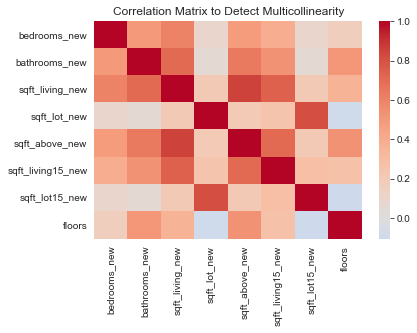

In [125]:
sns.heatmap(multi_df2.corr(), center = 0, cmap= "coolwarm");
plt.title("Correlation Matrix to Detect Multicollinearity")
plt.show()

Looking at the heatmap above we can see that there is a high correlation in between some of our variables, I will be dropping the `sqft_lot15_new`, `sqft_living15-new`, and `sqft_above_new` features. 

In [126]:
multi_df2 = multi_df2.drop(columns= ["sqft_lot15_new", "sqft_living15_new", "sqft_above_new"])

In [127]:
multi_df2.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,floors
0,3,1.00,1180,5650,1.0
1,3,2.25,2570,7242,2.0
2,2,1.00,770,10000,1.0
3,4,3.00,1960,5000,1.0
4,3,2.00,1680,8080,1.0


In [128]:
multi_df = multi_df.drop(columns= ["sqft_lot15_new", "sqft_living15_new", "sqft_above_new"])

In [129]:
multi_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,floors,waterfront,lat,long,"grd_(2, 3]","grd_(3, 4]","grd_(4, 5]","grd_(5, 6]","grd_(6, 7]","grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]",zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,zips_98014,zips_98019,zips_98022,zips_98023,zips_98024,zips_98027,zips_98028,zips_98029,zips_98030,zips_98031,zips_98032,zips_98033,zips_98034,zips_98038,zips_98039,zips_98040,zips_98042,zips_98045,zips_98052,zips_98053,zips_98055,zips_98056,zips_98058,zips_98059,zips_98065,zips_98070,zips_98072,zips_98074,zips_98075,zips_98077,zips_98092,zips_98102,zips_98103,zips_98105,zips_98106,zips_98107,zips_98108,zips_98109,zips_98112,zips_98115,zips_98116,zips_98117,zips_98118,zips_98119,zips_98122,zips_98125,zips_98126,zips_98133,zips_98136,zips_98144,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]",yr_reno_0.0,yr_reno_1934.0,yr_reno_1940.0,yr_reno_1944.0,yr_reno_1945.0,yr_reno_1948.0,yr_reno_1950.0,yr_reno_1951.0,yr_reno_1953.0,yr_reno_1954.0,yr_reno_1955.0,yr_reno_1956.0,yr_reno_1957.0,yr_reno_1958.0,yr_reno_1959.0,yr_reno_1960.0,yr_reno_1962.0,yr_reno_1963.0,yr_reno_1964.0,yr_reno_1965.0,yr_reno_1967.0,yr_reno_1968.0,yr_reno_1969.0,yr_reno_1970.0,yr_reno_1971.0,yr_reno_1972.0,yr_reno_1973.0,yr_reno_1974.0,yr_reno_1975.0,yr_reno_1976.0,yr_reno_1977.0,yr_reno_1978.0,yr_reno_1979.0,yr_reno_1980.0,yr_reno_1981.0,yr_reno_1982.0,yr_reno_1983.0,yr_reno_1984.0,yr_reno_1985.0,yr_reno_1986.0,yr_reno_1987.0,yr_reno_1988.0,yr_reno_1989.0,yr_reno_1990.0,yr_reno_1991.0,yr_reno_1992.0,yr_reno_1993.0,yr_reno_1994.0,yr_reno_1995.0,yr_reno_1996.0,yr_reno_1997.0,yr_reno_1998.0,yr_reno_1999.0,yr_reno_2000.0,yr_reno_2001.0,yr_reno_2002.0,yr_reno_2003.0,yr_reno_2004.0,yr_reno_2005.0,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0,"yr_built_(1900, 1910]","yr_built_(1910, 1920]","yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2020]","basement_(-1, 0]","basement_(0, 1611]"
0,3,1.00,1180,5650,1.0,0.0,47.5112,-122.257,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,3,2.25,2570,7242,2.0,0.0,47.7210,-122.319,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2,1.00,770,10000,1.0,0.0,47.7379,-122.233,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,4,3.00,1960,5000,1.0,0.0,47.5208,-122.393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [130]:
new_df = new_df.drop(columns = ["sqft_lot15_new", "sqft_living15_new", "sqft_above_new"])
new_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,price,floors,waterfront,lat,long,"grd_(2, 3]","grd_(3, 4]","grd_(4, 5]","grd_(5, 6]","grd_(6, 7]","grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]",zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,zips_98014,zips_98019,zips_98022,zips_98023,zips_98024,zips_98027,zips_98028,zips_98029,zips_98030,zips_98031,zips_98032,zips_98033,zips_98034,zips_98038,zips_98039,zips_98040,zips_98042,zips_98045,zips_98052,zips_98053,zips_98055,zips_98056,zips_98058,zips_98059,zips_98065,zips_98070,zips_98072,zips_98074,zips_98075,zips_98077,zips_98092,zips_98102,zips_98103,zips_98105,zips_98106,zips_98107,zips_98108,zips_98109,zips_98112,zips_98115,zips_98116,zips_98117,zips_98118,zips_98119,zips_98122,zips_98125,zips_98126,zips_98133,zips_98136,zips_98144,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]",yr_reno_0.0,yr_reno_1934.0,yr_reno_1940.0,yr_reno_1944.0,yr_reno_1945.0,yr_reno_1948.0,yr_reno_1950.0,yr_reno_1951.0,yr_reno_1953.0,yr_reno_1954.0,yr_reno_1955.0,yr_reno_1956.0,yr_reno_1957.0,yr_reno_1958.0,yr_reno_1959.0,yr_reno_1960.0,yr_reno_1962.0,yr_reno_1963.0,yr_reno_1964.0,yr_reno_1965.0,yr_reno_1967.0,yr_reno_1968.0,yr_reno_1969.0,yr_reno_1970.0,yr_reno_1971.0,yr_reno_1972.0,yr_reno_1973.0,yr_reno_1974.0,yr_reno_1975.0,yr_reno_1976.0,yr_reno_1977.0,yr_reno_1978.0,yr_reno_1979.0,yr_reno_1980.0,yr_reno_1981.0,yr_reno_1982.0,yr_reno_1983.0,yr_reno_1984.0,yr_reno_1985.0,yr_reno_1986.0,yr_reno_1987.0,yr_reno_1988.0,yr_reno_1989.0,yr_reno_1990.0,yr_reno_1991.0,yr_reno_1992.0,yr_reno_1993.0,yr_reno_1994.0,yr_reno_1995.0,yr_reno_1996.0,yr_reno_1997.0,yr_reno_1998.0,yr_reno_1999.0,yr_reno_2000.0,yr_reno_2001.0,yr_reno_2002.0,yr_reno_2003.0,yr_reno_2004.0,yr_reno_2005.0,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0,"yr_built_(1900, 1910]","yr_built_(1910, 1920]","yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2020]","basement_(-1, 0]","basement_(0, 1611]"
0,3,1.00,1180,5650,221900.0,1.0,0.0,47.5112,-122.257,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,3,2.25,2570,7242,538000.0,2.0,0.0,47.7210,-122.319,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2,1.00,770,10000,180000.0,1.0,0.0,47.7379,-122.233,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,4,3.00,1960,5000,604000.0,1.0,0.0,47.5208,-122.393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,

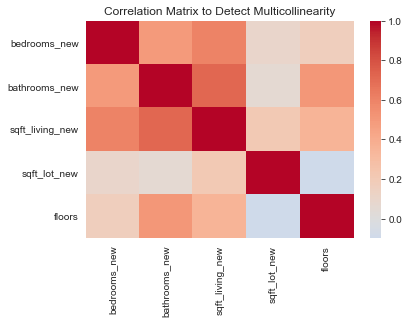

In [131]:
# Let's see the heatmap again to see how this worked.
sns.heatmap(multi_df2.corr(), center = 0, cmap= "coolwarm");
plt.title("Correlation Matrix to Detect Multicollinearity")
plt.show()

In [132]:
abs(multi_df2.corr()) > 0.75

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,floors
bedrooms_new,True,False,False,False,False
bathrooms_new,False,True,False,False,False
sqft_living_new,False,False,True,False,False
sqft_lot_new,False,False,False,True,False
floors,False,False,False,False,True


From the results of the heatmap and the correlation matrix we can see that we have handled our highly correlated features. 

## Normalization of our data

Here we will look and see which of our features need some transformations in order to improve our model's peformance.

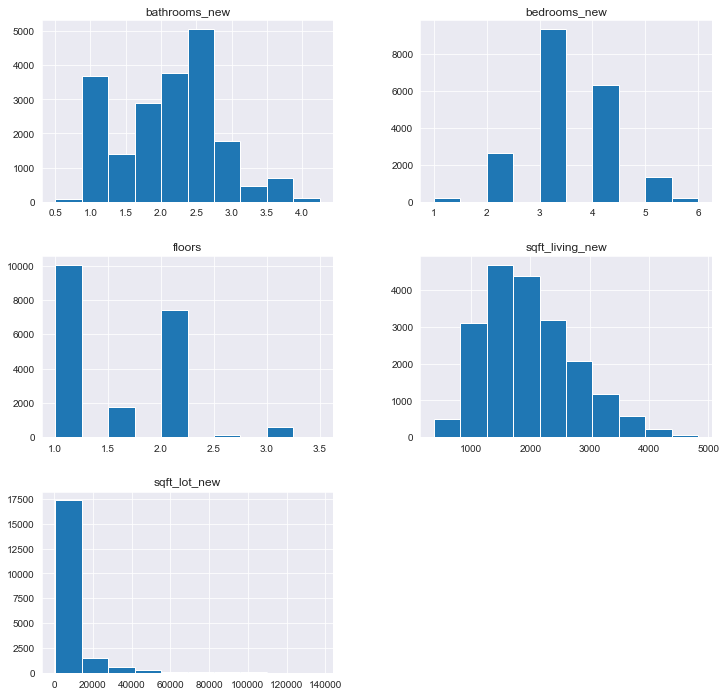

In [133]:
# First we will look at the histograms of our features that might need a log transformation.
multi_df2.hist(figsize = (12, 12));

The visualizaton above tells us that the `bedrooms_new`, `bathrooms_new`, `floors`, `sqft_living_new` and `sqft_lot_new` features have a skewed distribution, which will need a Log Transformation. 

In [134]:
log_trans = ["bedrooms_new", "bathrooms_new", "floors", "sqft_living_new", "sqft_lot_new"]
for feat in log_trans:
    multi_df2[feat] = multi_df2[feat].map(lambda x: np.log(x))


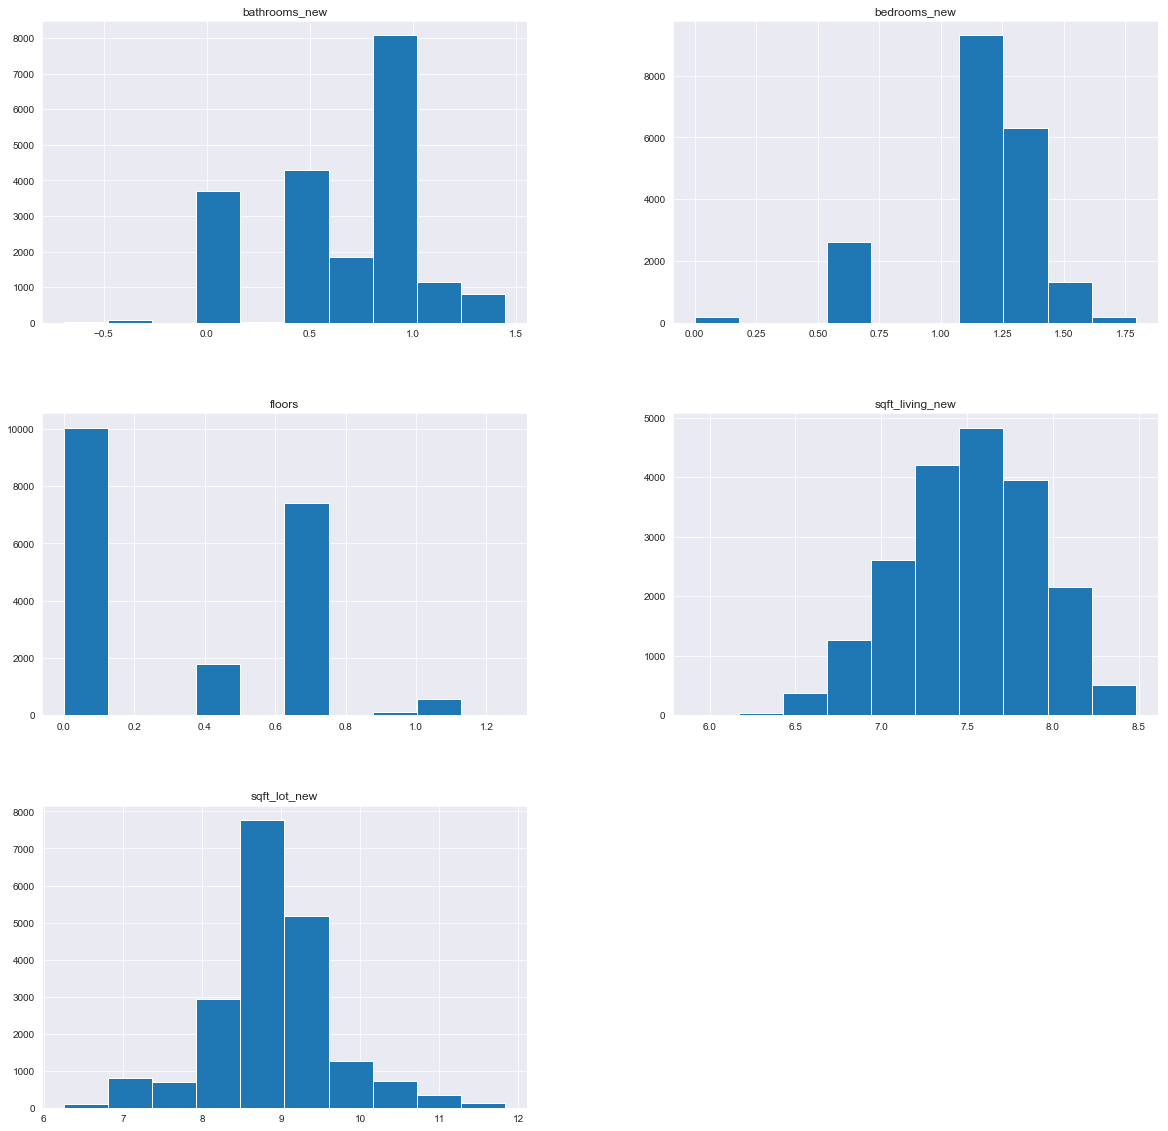

In [135]:
multi_df2.hist(figsize = (20, 20));

In [136]:
# Now I will apply the transformation to my other dataframes.
log_trans2 = ["bedrooms_new", "bathrooms_new", "floors", "sqft_living_new", "sqft_lot_new"]
for feat2 in log_trans2:
    new_df[feat2] = new_df[feat2].map(lambda x: np.log(x))

In [137]:
log_trans3 = ["bedrooms_new", "bathrooms_new", "floors", "sqft_living_new", "sqft_lot_new"]
for feat3 in log_trans3:
    multi_df[feat3] = multi_df[feat3].map(lambda x: np.log(x))

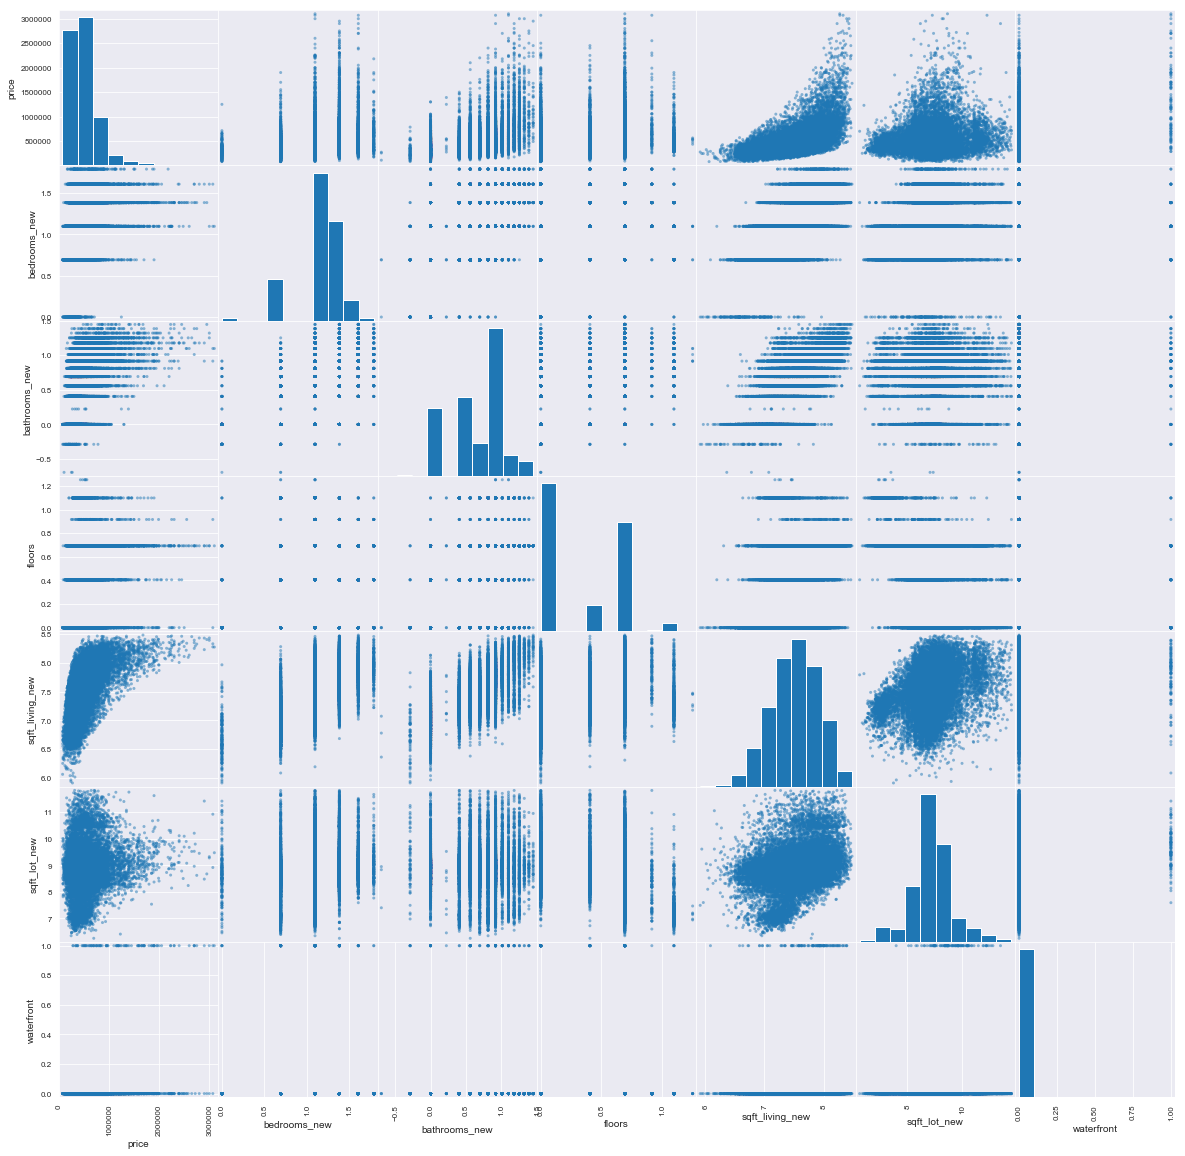

In [138]:
distro_df = ["price", "bedrooms_new", "bathrooms_new", "floors", "sqft_living_new", "sqft_lot_new", "waterfront"]
pd.plotting.scatter_matrix(new_df[distro_df], figsize= (20, 20));

Although they are not totally normal, my features have improved a bit.

## Scaling

In [139]:
# I will use the Min_Max Scaling in the data where it makes sense.
# lot = multi_df["sqft_lot_new"]
# liv = multi_df["sqft_living_new"]

# Next I will perform the scaling
# multi_df["sqft_lot_new"] = (lot-min(lot))/(max(lot)-min(lot))
# multi_df["sqft_living_new"] = (lot-min(liv))/(max(liv)-min(liv))

In [140]:
# multi_df["sqft_lot_new"].hist();

In [141]:
# multi_df["sqft_living_new"].hist();

### First model, without scaling or log transformation of price

In [142]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [143]:
pred = multi_df
pred_int = sm.add_constant(pred)
model = sm.OLS(new_df["price"], pred_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     514.4
Date:                Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:23:59   Log-Likelihood:            -2.6171e+05
No. Observations:               19948   AIC:                         5.238e+05
Df Residuals:                   19770   BIC:                         5.252e+05
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.279e+07   2.23e+06     -5.744      0.000   -1.72e+07   -8.43e+06
bedrooms_new          -1.144e+04   4393.577     -2.603      0.009      -2e+04   -2824.989
bathrooms_new          3.006e+04   4231.627      7.104      0.000    2.18e+04    3.84e+04
sqft_living_new        2.185e+05   4931.908     44.302      0.000    2.09e+05    2.28e+05
sqft_lot_new           4.115e+04   1910.781     21.534      0.000    3.74e+04    4.49e+04
floors                -1.174e+04   4229.379     -2.776      0.006      -2e+04   -3452.533
waterfront             3.884e+05   1.53e+04     25.439      0.000    3.59e+05    4.18e+05
lat                    7.628e+04   5.16e+04      1.477      0.140   -2.49e+04    1.77e+05
long                  -1.991e+05   3.77e+04     -5.286      0.000   -2.73e+05   -1.25e+05
grd_(2, 3]            -1.288e+06   2.49e+05     -5.180      0.000   -1.77e+06      -8e+05
grd_(3, 4]            -1.424e+06   2.24e+05     -6.360      0.000   -1.86e+06   -9.85e+05
grd_(4, 5]            -1.485e+06   2.23e+05     -6.665      0.000   -1.92e+06   -1.05e+06
grd_(5, 6]            -1.492e+06   2.23e+05     -6.689      0.000   -1.93e+06   -1.05e+06
grd_(6, 7]            -1.485e+06   2.23e+05     -6.656      0.000   -1.92e+06   -1.05e+06
grd_(7, 8]            -1.445e+06   2.23e+05     -6.474      0.000   -1.88e+06   -1.01e+06
grd_(8, 9]            -1.336e+06   2.23e+05     -5.987      0.000   -1.77e+06   -8.99e+05
grd_(9, 10]           -1.194e+06   2.23e+05     -5.346      0.000   -1.63e+06   -7.56e+05
grd_(10, 11]          -9.757e+05   2.24e+05     -4.364      0.000   -1.41e+06   -5.38e+05
grd_(11, 12]            -6.7e+05   2.26e+05     -2.966      0.003   -1.11e+06   -2.27e+05
cond_(0, 1]           -2.654e+06   4.46e+05     -5.950      0.000   -3.53e+06   -1.78e+06
cond_(1, 2]           -2.571e+06   4.46e+05     -5.770      0.000   -3.44e+06    -1.7e+06
cond_(2, 3]           -2.554e+06   4.46e+05     -5.733      0.000   -3.43e+06   -1.68e+06
cond_(3, 4]           -2.529e+06   4.45e+05     -5.678      0.000    -3.4e+06   -1.66e+06
cond_(4, 5]           -2.486e+06   4.45e+05     -5.580      0.000   -3.36e+06   -1.61e+06
4_sea_(0, 1]            -3.2e+06   5.57e+05     -5.746      0.000   -4.29e+06   -2.11e+06
4_sea_(1, 2]          -3.181e+06   5.57e+05     -5.712      0.000   -4.27e+06   -2.09e+06
4_sea_(2, 3]          -3.204e+06   5.57e+05     -5.754      0.000    -4.3e+06   -2.11e+06
4_sea_(3, 4]           -3.21e+06   5.57e+05     -5.764      0.000    -4.3e+06   -2.12e+06
zips_98001            -3.859e+05   3.19e+04    -12.111      0.000   -4.48e+05   -3.23e+05
zips_98002            -3.543e+05   3.02e+04    -11.717      0.000   -4.14e+05   -2.95e+05
zips_98003             -3.77e+05   3.34e+04    -11.286      0.000   -4.42e+05   -3.12e+05
zips_98004             

From this first model we can see that with an R-sq value of 0.822, we can say that 82% of the variations in price are explained by the features in the model. There are some predictors with p-values above 0.05, which means we cannot fully reject the null hypotesis that there is no relationship in between our predictors and price. 

### Second model, with a log transformation on `price`

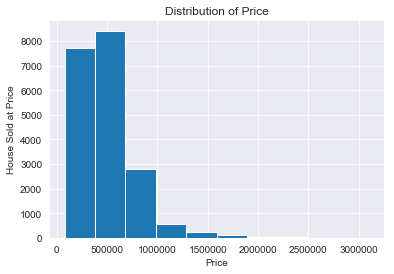

In [144]:
# price without log
new_df["price"].hist()
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("House Sold at Price")
plt.show()

It seems like it would be a good idea to transform price.

In [145]:
# Log Transformation to target_value
new_df["price"] = np.log(new_df["price"])

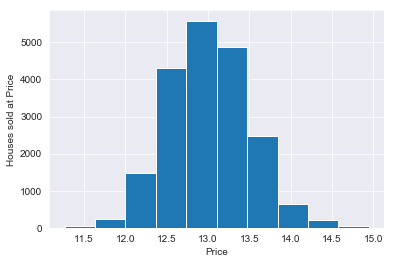

In [146]:
new_df["price"].hist();
plt.xlabel("Price")
plt.ylabel("Houses sold at Price")
plt.show()

Much better! Now let's see what it does to our model.

In [147]:
pred2 = multi_df
pred_int2 = sm.add_constant(pred2)
model2 = sm.OLS(new_df["price"], pred_int2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     787.8
Date:                Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:24:01   Log-Likelihood:                 6651.5
No. Observations:               19948   AIC:                        -1.295e+04
Df Residuals:                   19770   BIC:                        -1.154e+04
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -32.7403      3.200    -10.231      0.000     -39.013     -26.468
bedrooms_new             -0.0233      0.006     -3.697      0.000      -0.036      -0.011
bathrooms_new             0.0483      0.006      7.951      0.000       0.036       0.060
sqft_living_new           0.4418      0.007     62.351      0.000       0.428       0.456
sqft_lot_new              0.0839      0.003     30.569      0.000       0.079       0.089
floors                   -0.0402      0.006     -6.617      0.000      -0.052      -0.028
waterfront                0.3931      0.022     17.920      0.000       0.350       0.436
lat                       0.4360      0.074      5.878      0.000       0.291       0.581
long                     -0.5161      0.054     -9.537      0.000      -0.622      -0.410
grd_(2, 3]               -3.0341      0.357     -8.496      0.000      -3.734      -2.334
grd_(3, 4]               -3.5825      0.322    -11.136      0.000      -4.213      -2.952
grd_(4, 5]               -3.6110      0.320    -11.279      0.000      -4.238      -2.983
grd_(5, 6]               -3.5229      0.320    -10.995      0.000      -4.151      -2.895
grd_(6, 7]               -3.4273      0.320    -10.694      0.000      -4.056      -2.799
grd_(7, 8]               -3.3294      0.321    -10.385      0.000      -3.958      -2.701
grd_(8, 9]               -3.2049      0.321     -9.996      0.000      -3.833      -2.576
grd_(9, 10]              -3.1147      0.321     -9.712      0.000      -3.743      -2.486
grd_(10, 11]             -2.9942      0.321     -9.323      0.000      -3.624      -2.365
grd_(11, 12]             -2.9193      0.325     -8.995      0.000      -3.555      -2.283
cond_(0, 1]              -6.7716      0.641    -10.568      0.000      -8.028      -5.516
cond_(1, 2]              -6.6274      0.640    -10.352      0.000      -7.882      -5.373
cond_(2, 3]              -6.5003      0.640    -10.156      0.000      -7.755      -5.246
cond_(3, 4]              -6.4513      0.640    -10.081      0.000      -7.706      -5.197
cond_(4, 5]              -6.3897      0.640     -9.985      0.000      -7.644      -5.135
4_sea_(0, 1]             -8.1879      0.800    -10.235      0.000      -9.756      -6.620
4_sea_(1, 2]             -8.1512      0.800    -10.189      0.000      -9.719      -6.583
4_sea_(2, 3]             -8.1955      0.800    -10.245      0.000      -9.764      -6.628
4_sea_(3, 4]             -8.2056      0.800    -10.257      0.000      -9.774      -6.638
zips_98001               -0.8838      0.046    -19.306      0.000      -0.974      -0.794
zips_98002               -0.8625      0.043    -19.854      0.000      -0.948      -0.777
zips_98003               -0.8594      0.048    -17.909      0.000      -0.953      -0.765
zips_98004             

After performing a log transformation on our dependent variable we have improved the R-sq value to 0.876, this also means that the interpretation of our coefficients change a bit. Now we can say that the model predicts that a 1% increase in `bedrooms_new` for instance, will decrease the price by 2%. 

In [148]:
# Since there are P values that are higher than 0.05 and the observations we have are quite high I will just drop them
# and rebuild the model.
multi_df = multi_df.drop(columns = ["zips_98040", "zips_98102", "zips_98105", "zips_98109", "zips_98112", "zips_98119"])
multi_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,floors,waterfront,lat,long,"grd_(2, 3]","grd_(3, 4]","grd_(4, 5]","grd_(5, 6]","grd_(6, 7]","grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]",zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,zips_98014,zips_98019,zips_98022,zips_98023,zips_98024,zips_98027,zips_98028,zips_98029,zips_98030,zips_98031,zips_98032,zips_98033,zips_98034,zips_98038,zips_98039,zips_98042,zips_98045,zips_98052,zips_98053,zips_98055,zips_98056,zips_98058,zips_98059,zips_98065,zips_98070,zips_98072,zips_98074,zips_98075,zips_98077,zips_98092,zips_98103,zips_98106,zips_98107,zips_98108,zips_98115,zips_98116,zips_98117,zips_98118,zips_98122,zips_98125,zips_98126,zips_98133,zips_98136,zips_98144,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]",yr_reno_0.0,yr_reno_1934.0,yr_reno_1940.0,yr_reno_1944.0,yr_reno_1945.0,yr_reno_1948.0,yr_reno_1950.0,yr_reno_1951.0,yr_reno_1953.0,yr_reno_1954.0,yr_reno_1955.0,yr_reno_1956.0,yr_reno_1957.0,yr_reno_1958.0,yr_reno_1959.0,yr_reno_1960.0,yr_reno_1962.0,yr_reno_1963.0,yr_reno_1964.0,yr_reno_1965.0,yr_reno_1967.0,yr_reno_1968.0,yr_reno_1969.0,yr_reno_1970.0,yr_reno_1971.0,yr_reno_1972.0,yr_reno_1973.0,yr_reno_1974.0,yr_reno_1975.0,yr_reno_1976.0,yr_reno_1977.0,yr_reno_1978.0,yr_reno_1979.0,yr_reno_1980.0,yr_reno_1981.0,yr_reno_1982.0,yr_reno_1983.0,yr_reno_1984.0,yr_reno_1985.0,yr_reno_1986.0,yr_reno_1987.0,yr_reno_1988.0,yr_reno_1989.0,yr_reno_1990.0,yr_reno_1991.0,yr_reno_1992.0,yr_reno_1993.0,yr_reno_1994.0,yr_reno_1995.0,yr_reno_1996.0,yr_reno_1997.0,yr_reno_1998.0,yr_reno_1999.0,yr_reno_2000.0,yr_reno_2001.0,yr_reno_2002.0,yr_reno_2003.0,yr_reno_2004.0,yr_reno_2005.0,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0,"yr_built_(1900, 1910]","yr_built_(1910, 1920]","yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2020]","basement_(-1, 0]","basement_(0, 1611]"
0,1.098612,0.000000,7.073270,8.639411,0.000000,0.0,47.5112,-122.257,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1.098612,0.810930,7.851661,8.887653,0.693147,0.0,47.7210,-122.319,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0.693147,0.000000,6.646391,9.210340,0.000000,0.0,47.7379,-122.233,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1.386294,1.098612,7.580700,8.517193,0.000000,0.0,47.5208,-122.393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [149]:
multi_df = multi_df.drop(columns = ["yr_reno_1934.0", "yr_reno_1954.0"])
multi_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,floors,waterfront,lat,long,"grd_(2, 3]","grd_(3, 4]","grd_(4, 5]","grd_(5, 6]","grd_(6, 7]","grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]",zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,zips_98014,zips_98019,zips_98022,zips_98023,zips_98024,zips_98027,zips_98028,zips_98029,zips_98030,zips_98031,zips_98032,zips_98033,zips_98034,zips_98038,zips_98039,zips_98042,zips_98045,zips_98052,zips_98053,zips_98055,zips_98056,zips_98058,zips_98059,zips_98065,zips_98070,zips_98072,zips_98074,zips_98075,zips_98077,zips_98092,zips_98103,zips_98106,zips_98107,zips_98108,zips_98115,zips_98116,zips_98117,zips_98118,zips_98122,zips_98125,zips_98126,zips_98133,zips_98136,zips_98144,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]",yr_reno_0.0,yr_reno_1940.0,yr_reno_1944.0,yr_reno_1945.0,yr_reno_1948.0,yr_reno_1950.0,yr_reno_1951.0,yr_reno_1953.0,yr_reno_1955.0,yr_reno_1956.0,yr_reno_1957.0,yr_reno_1958.0,yr_reno_1959.0,yr_reno_1960.0,yr_reno_1962.0,yr_reno_1963.0,yr_reno_1964.0,yr_reno_1965.0,yr_reno_1967.0,yr_reno_1968.0,yr_reno_1969.0,yr_reno_1970.0,yr_reno_1971.0,yr_reno_1972.0,yr_reno_1973.0,yr_reno_1974.0,yr_reno_1975.0,yr_reno_1976.0,yr_reno_1977.0,yr_reno_1978.0,yr_reno_1979.0,yr_reno_1980.0,yr_reno_1981.0,yr_reno_1982.0,yr_reno_1983.0,yr_reno_1984.0,yr_reno_1985.0,yr_reno_1986.0,yr_reno_1987.0,yr_reno_1988.0,yr_reno_1989.0,yr_reno_1990.0,yr_reno_1991.0,yr_reno_1992.0,yr_reno_1993.0,yr_reno_1994.0,yr_reno_1995.0,yr_reno_1996.0,yr_reno_1997.0,yr_reno_1998.0,yr_reno_1999.0,yr_reno_2000.0,yr_reno_2001.0,yr_reno_2002.0,yr_reno_2003.0,yr_reno_2004.0,yr_reno_2005.0,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0,"yr_built_(1900, 1910]","yr_built_(1910, 1920]","yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2020]","basement_(-1, 0]","basement_(0, 1611]"
0,1.098612,0.000000,7.073270,8.639411,0.000000,0.0,47.5112,-122.257,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1.098612,0.810930,7.851661,8.887653,0.693147,0.0,47.7210,-122.319,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0.693147,0.000000,6.646391,9.210340,0.000000,0.0,47.7379,-122.233,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1.386294,1.098612,7.580700,8.517193,0.000000,0.0,47.5208,-122.393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [150]:
multi_df = multi_df.drop(columns = ["yr_built_(1900, 1910]", "yr_built_(1910, 1920]", "yr_built_(1920, 1930]",
                                   "yr_built_(1930, 1940]", "yr_built_(2000, 2020]"])
multi_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,floors,waterfront,lat,long,"grd_(2, 3]","grd_(3, 4]","grd_(4, 5]","grd_(5, 6]","grd_(6, 7]","grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]",zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,zips_98014,zips_98019,zips_98022,zips_98023,zips_98024,zips_98027,zips_98028,zips_98029,zips_98030,zips_98031,zips_98032,zips_98033,zips_98034,zips_98038,zips_98039,zips_98042,zips_98045,zips_98052,zips_98053,zips_98055,zips_98056,zips_98058,zips_98059,zips_98065,zips_98070,zips_98072,zips_98074,zips_98075,zips_98077,zips_98092,zips_98103,zips_98106,zips_98107,zips_98108,zips_98115,zips_98116,zips_98117,zips_98118,zips_98122,zips_98125,zips_98126,zips_98133,zips_98136,zips_98144,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]",yr_reno_0.0,yr_reno_1940.0,yr_reno_1944.0,yr_reno_1945.0,yr_reno_1948.0,yr_reno_1950.0,yr_reno_1951.0,yr_reno_1953.0,yr_reno_1955.0,yr_reno_1956.0,yr_reno_1957.0,yr_reno_1958.0,yr_reno_1959.0,yr_reno_1960.0,yr_reno_1962.0,yr_reno_1963.0,yr_reno_1964.0,yr_reno_1965.0,yr_reno_1967.0,yr_reno_1968.0,yr_reno_1969.0,yr_reno_1970.0,yr_reno_1971.0,yr_reno_1972.0,yr_reno_1973.0,yr_reno_1974.0,yr_reno_1975.0,yr_reno_1976.0,yr_reno_1977.0,yr_reno_1978.0,yr_reno_1979.0,yr_reno_1980.0,yr_reno_1981.0,yr_reno_1982.0,yr_reno_1983.0,yr_reno_1984.0,yr_reno_1985.0,yr_reno_1986.0,yr_reno_1987.0,yr_reno_1988.0,yr_reno_1989.0,yr_reno_1990.0,yr_reno_1991.0,yr_reno_1992.0,yr_reno_1993.0,yr_reno_1994.0,yr_reno_1995.0,yr_reno_1996.0,yr_reno_1997.0,yr_reno_1998.0,yr_reno_1999.0,yr_reno_2000.0,yr_reno_2001.0,yr_reno_2002.0,yr_reno_2003.0,yr_reno_2004.0,yr_reno_2005.0,yr_reno_2006.0,yr_reno_2007.0,yr_reno_2008.0,yr_reno_2009.0,yr_reno_2010.0,yr_reno_2011.0,yr_reno_2012.0,yr_reno_2013.0,yr_reno_2014.0,yr_reno_2015.0,"yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","basement_(-1, 0]","basement_(0, 1611]"
0,1.098612,0.000000,7.073270,8.639411,0.000000,0.0,47.5112,-122.257,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1.098612,0.810930,7.851661,8.887653,0.693147,0.0,47.7210,-122.319,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0.693147,0.000000,6.646391,9.210340,0.000000,0.0,47.7379,-122.233,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.386294,1.098612,7.580700,8.517193,0.000000,0.0,47.5208,-122.393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1.098612,0.693147,7.426549,8.997147,0.000000,0.0,47.6168,-122.045,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,

### Third model without high P-values

   Let's see what happens without those values.
  

In [151]:
pred3 = multi_df
pred_int3 = sm.add_constant(pred3)
model3 = sm.OLS(new_df["price"], pred_int3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     836.9
Date:                Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:24:02   Log-Likelihood:                 6613.8
No. Observations:               19948   AIC:                        -1.289e+04
Df Residuals:                   19781   BIC:                        -1.157e+04
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -29.9757      2.852    -10.511      0.000     -35.566     -24.386
bedrooms_new             -0.0242      0.006     -3.847      0.000      -0.037      -0.012
bathrooms_new             0.0483      0.006      8.379      0.000       0.037       0.060
sqft_living_new           0.4428      0.007     62.836      0.000       0.429       0.457
sqft_lot_new              0.0830      0.003     31.934      0.000       0.078       0.088
floors                   -0.0391      0.006     -6.593      0.000      -0.051      -0.028
waterfront                0.3943      0.022     17.955      0.000       0.351       0.437
lat                       0.3729      0.068      5.484      0.000       0.240       0.506
long                     -0.4874      0.050     -9.720      0.000      -0.586      -0.389
grd_(2, 3]               -2.7628      0.326     -8.466      0.000      -3.402      -2.123
grd_(3, 4]               -3.3080      0.287    -11.515      0.000      -3.871      -2.745
grd_(4, 5]               -3.3359      0.286    -11.681      0.000      -3.896      -2.776
grd_(5, 6]               -3.2474      0.286    -11.361      0.000      -3.808      -2.687
grd_(6, 7]               -3.1511      0.286    -11.019      0.000      -3.712      -2.591
grd_(7, 8]               -3.0526      0.286    -10.672      0.000      -3.613      -2.492
grd_(8, 9]               -2.9267      0.286    -10.235      0.000      -3.487      -2.366
grd_(9, 10]              -2.8365      0.286     -9.921      0.000      -3.397      -2.276
grd_(10, 11]             -2.7136      0.286     -9.480      0.000      -3.275      -2.153
grd_(11, 12]             -2.6411      0.290     -9.118      0.000      -3.209      -2.073
cond_(0, 1]              -6.2156      0.571    -10.882      0.000      -7.335      -5.096
cond_(1, 2]              -6.0742      0.571    -10.646      0.000      -7.193      -4.956
cond_(2, 3]              -5.9481      0.570    -10.428      0.000      -7.066      -4.830
cond_(3, 4]              -5.8995      0.570    -10.344      0.000      -7.017      -4.782
cond_(4, 5]              -5.8382      0.570    -10.235      0.000      -6.956      -4.720
4_sea_(0, 1]             -7.4966      0.713    -10.514      0.000      -8.894      -6.099
4_sea_(1, 2]             -7.4601      0.713    -10.464      0.000      -8.858      -6.063
4_sea_(2, 3]             -7.5045      0.713    -10.525      0.000      -8.902      -6.107
4_sea_(3, 4]             -7.5145      0.713    -10.539      0.000      -8.912      -6.117
zips_98001               -0.8700      0.024    -36.421      0.000      -0.917      -0.823
zips_98002               -0.8509      0.025    -33.760      0.000      -0.900      -0.802
zips_98003               -0.8446      0.024    -34.729      0.000      -0.892      -0.797
zips_98004             

In this third model, after dropping features that gave high P-values, `yr_reno_`, is still producing coefficients with no statistical signficance. I will totally drop yr_renovated from my next model. 

In [152]:
# I will drop all the "yr_reno_features"
feat_df = multi_df[multi_df.columns.drop(list(multi_df.filter(regex = "yr_reno")))]
feat_df.head()

,bedrooms_new,bathrooms_new,sqft_living_new,sqft_lot_new,floors,waterfront,lat,long,"grd_(2, 3]","grd_(3, 4]","grd_(4, 5]","grd_(5, 6]","grd_(6, 7]","grd_(7, 8]","grd_(8, 9]","grd_(9, 10]","grd_(10, 11]","grd_(11, 12]","cond_(0, 1]","cond_(1, 2]","cond_(2, 3]","cond_(3, 4]","cond_(4, 5]","4_sea_(0, 1]","4_sea_(1, 2]","4_sea_(2, 3]","4_sea_(3, 4]",zips_98001,zips_98002,zips_98003,zips_98004,zips_98005,zips_98006,zips_98007,zips_98008,zips_98010,zips_98011,zips_98014,zips_98019,zips_98022,zips_98023,zips_98024,zips_98027,zips_98028,zips_98029,zips_98030,zips_98031,zips_98032,zips_98033,zips_98034,zips_98038,zips_98039,zips_98042,zips_98045,zips_98052,zips_98053,zips_98055,zips_98056,zips_98058,zips_98059,zips_98065,zips_98070,zips_98072,zips_98074,zips_98075,zips_98077,zips_98092,zips_98103,zips_98106,zips_98107,zips_98108,zips_98115,zips_98116,zips_98117,zips_98118,zips_98122,zips_98125,zips_98126,zips_98133,zips_98136,zips_98144,zips_98146,zips_98148,zips_98155,zips_98166,zips_98168,zips_98177,zips_98178,zips_98188,zips_98198,zips_98199,"view_(-1, 0]","view_(0, 1]","view_(1, 2]","view_(2, 3]","view_(3, 4]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","basement_(-1, 0]","basement_(0, 1611]"
0,1.098612,0.000000,7.073270,8.639411,0.000000,0.0,47.5112,-122.257,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,1.098612,0.810930,7.851661,8.887653,0.693147,0.0,47.7210,-122.319,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0.693147,0.000000,6.646391,9.210340,0.000000,0.0,47.7379,-122.233,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1.386294,1.098612,7.580700,8.517193,0.000000,0.0,47.5208,-122.393,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,1.098612,0.693147,7.426549,8.997147,0.000000,0.0,47.6168,-122.045,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


### Fourth model without the `yr_reno_` feature

In [153]:
pred4 = feat_df
pred_int4 = sm.add_constant(pred4)
model4 = sm.OLS(new_df["price"], pred_int4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1385.
Date:                Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:24:03   Log-Likelihood:                 6472.7
No. Observations:               19948   AIC:                        -1.275e+04
Df Residuals:                   19848   BIC:                        -1.196e+04
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -29.9201      2.861    -10.457      0.000     -35.528     -24.312
bedrooms_new             -0.0256      0.006     -4.062      0.000      -0.038      -0.013
bathrooms_new             0.0536      0.006      9.291      0.000       0.042       0.065
sqft_living_new           0.4430      0.007     62.690      0.000       0.429       0.457
sqft_lot_new              0.0839      0.003     32.309      0.000       0.079       0.089
floors                   -0.0382      0.006     -6.418      0.000      -0.050      -0.027
waterfront                0.4008      0.022     18.311      0.000       0.358       0.444
lat                       0.3678      0.068      5.389      0.000       0.234       0.502
long                     -0.4864      0.050     -9.667      0.000      -0.585      -0.388
grd_(2, 3]               -2.7512      0.328     -8.399      0.000      -3.393      -2.109
grd_(3, 4]               -3.2999      0.288    -11.449      0.000      -3.865      -2.735
grd_(4, 5]               -3.3274      0.287    -11.614      0.000      -3.889      -2.766
grd_(5, 6]               -3.2415      0.287    -11.303      0.000      -3.804      -2.679
grd_(6, 7]               -3.1460      0.287    -10.966      0.000      -3.708      -2.584
grd_(7, 8]               -3.0473      0.287    -10.619      0.000      -3.610      -2.485
grd_(8, 9]               -2.9213      0.287    -10.182      0.000      -3.484      -2.359
grd_(9, 10]              -2.8310      0.287     -9.870      0.000      -3.393      -2.269
grd_(10, 11]             -2.7115      0.287     -9.442      0.000      -3.274      -2.149
grd_(11, 12]             -2.6430      0.291     -9.094      0.000      -3.213      -2.073
cond_(0, 1]              -6.2043      0.573    -10.827      0.000      -7.328      -5.081
cond_(1, 2]              -6.0664      0.572    -10.598      0.000      -7.188      -4.944
cond_(2, 3]              -5.9332      0.572    -10.368      0.000      -7.055      -4.811
cond_(3, 4]              -5.8883      0.572    -10.290      0.000      -7.010      -4.767
cond_(4, 5]              -5.8280      0.572    -10.184      0.000      -6.950      -4.706
4_sea_(0, 1]             -7.4829      0.715    -10.461      0.000      -8.885      -6.081
4_sea_(1, 2]             -7.4462      0.715    -10.410      0.000      -8.848      -6.044
4_sea_(2, 3]             -7.4905      0.715    -10.472      0.000      -8.893      -6.088
4_sea_(3, 4]             -7.5006      0.715    -10.485      0.000      -8.903      -6.098
zips_98001               -0.8764      0.024    -36.558      0.000      -0.923      -0.829
zips_98002               -0.8550      0.025    -33.808      0.000      -0.905      -0.805
zips_98003               -0.8510      0.024    -34.868      0.000      -0.899      -0.803
zips_98004             

## Model Fit

Now it's time to select the best features for our model to enhance it's performance and for later validation and evaluation.
Since there is a good amount of data and because I didn't do any scaling to my variables, I will be using step-wise selection. 

In [154]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [155]:
result = stepwise_selection(feat_df, new_df["price"], verbose = True)
print('resulting features:')
print(result)

Add  bedrooms_new                   with p-value 0.0
Add  grd_(6, 7]                     with p-value 0.0
Add  view_(-1, 0]                   with p-value 0.0
Add  grd_(5, 6]                     with p-value 0.0
Add  grd_(7, 8]                     with p-value 0.0
Add  lat                            with p-value 0.0
Add  grd_(4, 5]                     with p-value 0.0
Add  sqft_living_new                with p-value 0.0
Add  zips_98004                     with p-value 6.49551e-255
Add  zips_98155                     with p-value 1.61866e-136
Add  cond_(2, 3]                    with p-value 8.98114e-137
Add  zips_98133                     with p-value 1.22278e-142
Add  zips_98028                     with p-value 2.23248e-137
Add  zips_98019                     with p-value 1.50597e-114
Add  waterfront                     with p-value 6.52935e-106
Add  zips_98034                     with p-value 4.15557e-111
Add  zips_98011                     with p-value 3.39778e-119
Add  zips_98072   

C:\Users\teach\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  zips_98038                     with p-value 1.36714e-20
Add  zips_98166                     with p-value 3.31561e-19
Drop zips_98136                     with p-value 0.127768
Add  zips_98199                     with p-value 9.2288e-21
Add  yr_built_(1990, 2000]          with p-value 2.29691e-19
Add  zips_98144                     with p-value 1.41828e-19
Add  zips_98008                     with p-value 1.48282e-16
Add  zips_98075                     with p-value 1.72358e-17
Add  zips_98030                     with p-value 1.13053e-14
Drop bedrooms_new                   with p-value 0.0500022
Add  zips_98148                     with p-value 3.09235e-15
Add  zips_98023                     with p-value 7.05316e-14
Add  zips_98042                     with p-value 2.97405e-15
Add  yr_built_(1940, 1950]          with p-value 4.55126e-13
Add  zips_98070                     with p-value 7.59535e-14
Add  zips_98001                     with p-value 1.41924e-14
Add  zips_98003               

According to stepwise selection, I should only drop a few features and keep the rest. I will make a new DF with the features that were filtered out. 

In [156]:
fin_feat_df = feat_df[['grd_(5, 6]', 'lat', 'grd_(6, 7]', 'grd_(7, 8]', 'view_(-1, 0]', 'sqft_living_new', 'zips_98004',
                       'grd_(4, 5]', 'cond_(2, 3]', 'zips_98155', 'zips_98133', 'zips_98028', 'zips_98019', 'waterfront',
                       'zips_98034', 'zips_98011', 'zips_98072', 'zips_98125', 'zips_98077', 'zips_98177', 'zips_98168',
                       'zips_98014', 'zips_98178', 'zips_98052', 'zips_98022', 'zips_98053', 'zips_98039', 'grd_(8, 9]',
                       'zips_98106', 'zips_98074', 'sqft_lot_new', 'grd_(3, 4]', 'zips_98055', 'zips_98058', '4_sea_(1, 2]',
                       'cond_(4, 5]', 'zips_98056', 'zips_98108', 'zips_98146', 'zips_98188', 'cond_(3, 4]', 'zips_98031',
                       'zips_98198', 'yr_built_(1960, 1970]', 'yr_built_(1970, 1980]', 'yr_built_(1950, 1960]',
                       'yr_built_(1980, 1990]', 'zips_98117', 'zips_98115', 'long', 'zips_98118', 'zips_98103', 
                       'zips_98033', 'view_(3, 4]', 'zips_98010', 'zips_98032', 'zips_98059', 'grd_(9, 10]', 
                       'zips_98126', 'zips_98107', 'zips_98166', 'zips_98199', 'yr_built_(1990, 2000]', 
                       'zips_98144', 'zips_98008', 'zips_98075', 'zips_98030', 'zips_98148', 'zips_98023', 
                       'zips_98042', 'yr_built_(1940, 1950]', 'zips_98070', 'zips_98001', 'zips_98003', 
                       'zips_98002', 'zips_98092', 'zips_98038', 'zips_98136', 'zips_98116', 'zips_98122',
                       'zips_98027', 'zips_98006', 'bathrooms_new', 'basement_(0, 1611]', 'basement_(-1, 0]',
                       'view_(2, 3]', 'zips_98007', 'floors', 'zips_98024', 'zips_98065', 'zips_98045', 'zips_98029',
                       'zips_98005', '4_sea_(3, 4]', 'bedrooms_new', 'cond_(0, 1]', 'cond_(1, 2]']]

Now that I have selected the best features for my model, let's run the model.

In [157]:
pred5 = fin_feat_df
pred_int5 = sm.add_constant(pred5)
model5 = sm.OLS(new_df["price"], pred_int5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1444.
Date:                Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:35:59   Log-Likelihood:                 6469.7
No. Observations:               19948   AIC:                        -1.275e+04
Df Residuals:                   19852   BIC:                        -1.199e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -39.4604      3.787    -10.421      0.000     -46.882     -32.038
grd_(5, 6]               -0.5331      0.015    -35.172      0.000      -0.563      -0.503
lat                       0.3689      0.068      5.406      0.000       0.235       0.503
grd_(6, 7]               -0.4377      0.014    -31.196      0.000      -0.465      -0.410
grd_(7, 8]               -0.3391      0.014    -24.942      0.000      -0.366      -0.312
view_(-1, 0]             -0.1313      0.006    -22.925      0.000      -0.143      -0.120
sqft_living_new           0.4432      0.007     62.760      0.000       0.429       0.457
zips_98004                0.2010      0.013     15.146      0.000       0.175       0.227
grd_(4, 5]               -0.6187      0.019    -32.183      0.000      -0.656      -0.581
cond_(2, 3]              -7.8414      0.757    -10.354      0.000      -9.326      -6.357
zips_98155               -0.6095      0.014    -44.260      0.000      -0.636      -0.582
zips_98133               -0.5879      0.012    -47.128      0.000      -0.612      -0.563
zips_98028               -0.5952      0.016    -37.946      0.000      -0.626      -0.564
zips_98019               -0.5612      0.025    -22.461      0.000      -0.610      -0.512
waterfront                0.4015      0.022     18.359      0.000       0.359       0.444
zips_98034               -0.4133      0.013    -31.370      0.000      -0.439      -0.388
zips_98011               -0.5213      0.018    -29.066      0.000      -0.556      -0.486
zips_98072               -0.4698      0.018    -25.765      0.000      -0.505      -0.434
zips_98125               -0.4531      0.012    -36.724      0.000      -0.477      -0.429
zips_98077               -0.4892      0.022    -22.382      0.000      -0.532      -0.446
zips_98177               -0.4651      0.015    -30.286      0.000      -0.495      -0.435
zips_98168               -0.8807      0.016    -56.321      0.000      -0.911      -0.850
zips_98014               -0.5215      0.031    -16.697      0.000      -0.583      -0.460
zips_98178               -0.7748      0.015    -51.221      0.000      -0.804      -0.745
zips_98052               -0.2621      0.014    -18.631      0.000      -0.290      -0.235
zips_98022               -0.6950      0.033    -21.016      0.000      -0.760      -0.630
zips_98053               -0.3039      0.019    -16.161      0.000      -0.341      -0.267
zips_98039                0.3739      0.032     11.591      0.000       0.311       0.437
grd_(8, 9]               -0.2131      0.014    -15.738      0.000      -0.240      -0.187
zips_98106               -0.6447      0.013    -48.116      0.000      -0.671      -0.618
zips_98074               -0.2999      0.016    -18.231      0.000      -0.332      -0.268
sqft_lot_new           

In the final model we can see that the R-sq values stayed the same and we can now reject the null hypothesis and say that the predictors do have some kind of realtionship with price. The model gives us some interesting insight into what things to look for when buying or selling a house. If you want to minimize the cost of the house for example you can focus on looking for a place that has less square footage than higher priced houses. What this means is that the square footage of a house has significant impact on it's value. 

### Impact of coefficients

- `sqft_living_new` tells us that for every 1% increase in square footage the price will increase by 44%
- `bedrooms_new` tells us that if the bedrooms are increased in the home the price will decrease by 2%
- `bathrooms_new` tells us that if the bathrooms are increase so will the price by 5%

## Regression Model Validation

Next I will begin the evaluation and validation of my model that will predict home prices in Kings County.

In [158]:
X = fin_feat_df
y = new_df["price"]

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15958 3990 15958 3990


In [161]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

pred_train = linreg.predict(X_train)
pred_test = linreg.predict(X_test)

In [162]:
resi_train = pred_train - y_train
resi_test = pred_test - y_test

In [163]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.030793551139361445
Test Mean Squarred Error: 0.030023919745827982
